In [2]:
import config as c
import utils as u
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
%load_ext autoreload
%autoreload 2


# 1. Over Time


## 1.1 Load


In [5]:
tdf = pd.read_parquet("data/V2_tdf_continued_stage_11.parquet")

tdf["days_relative_to_stage_11_adj"] = tdf["days_relative_to_stage_11"] + 1


In [10]:
N_SESSIONS = 100
stage11_summary_df = tdf.query("days_relative_to_stage_11_adj <= @N_SESSIONS").groupby(["animal_id", "days_relative_to_stage_11_adj"]).agg(
    violation_rate=("violation_rate", "mean"),
    n_trials=("trial", "count"),
    fixation_duration=("fixation_dur", "max"),
).reset_index()

stage11_summary_df["violation_rate"] = stage11_summary_df["violation_rate"] * 100

stage11_summary_df.head()

,animal_id,days_relative_to_stage_11_adj,violation_rate,n_trials,fixation_duration
0,R041,1,25.289941,169,1.597556
1,R041,2,20.527174,184,1.391873
2,R041,3,23.225564,133,1.406721
3,R041,4,24.684211,171,1.679369
4,R041,5,18.185629,167,1.392952


## 1.2 Over days


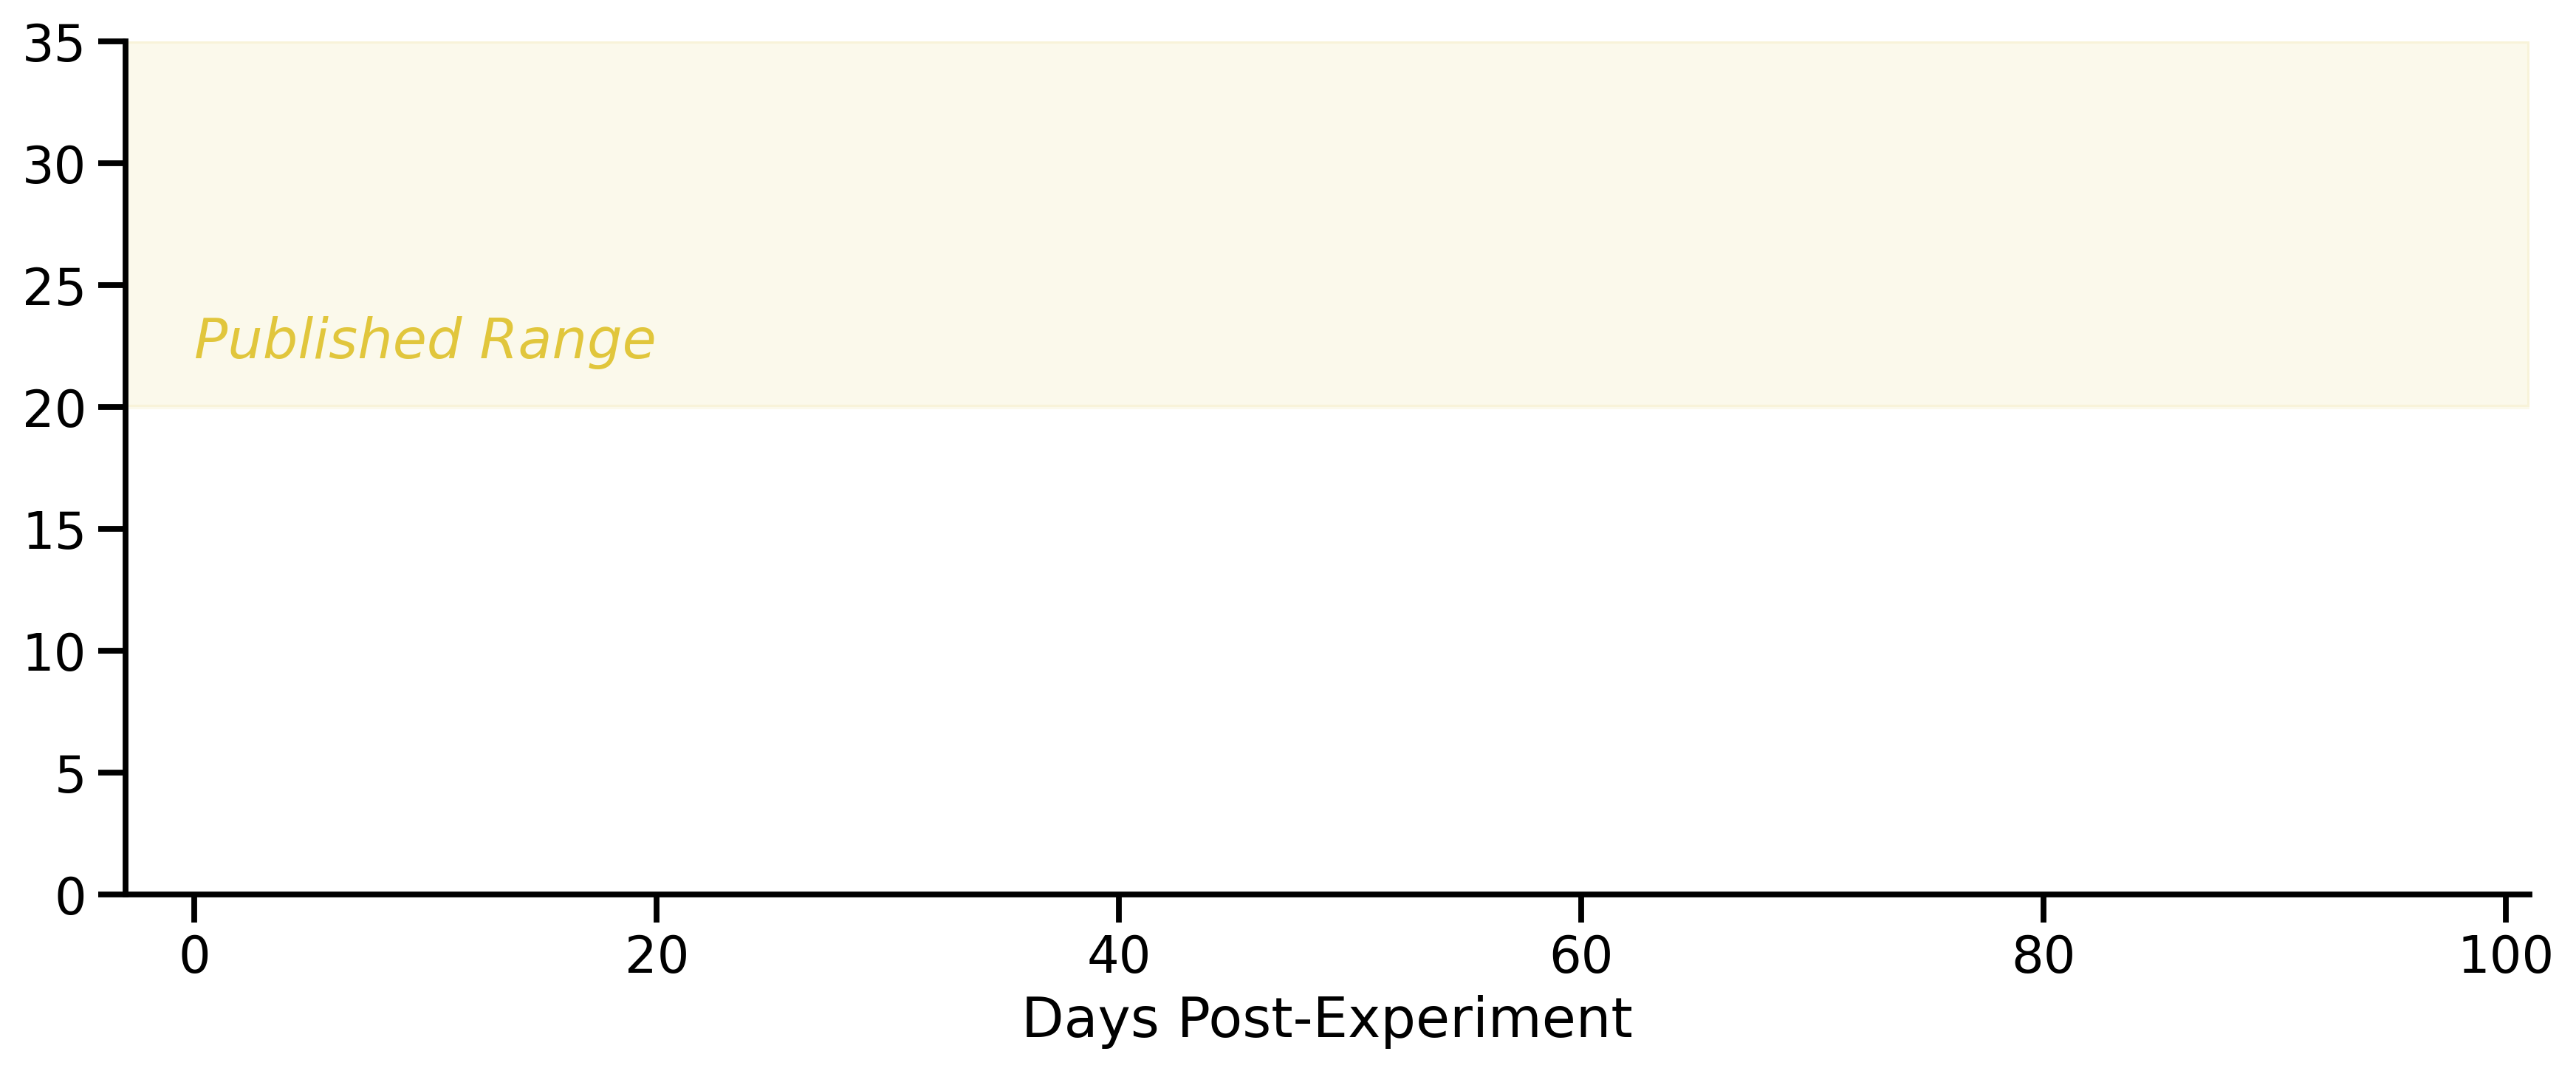

In [212]:

fig, ax = plt.subplots(figsize=(14, 5), dpi=300)
# sns.lineplot(data=stage11_summary_df.query("animal_id == @c.DEMO_ANIMAL"), x="days_relative_to_stage_11_adj", y="violation_rate", ax=ax, errorbar="se", marker="o", color="white")

# ax.grid(True, alpha=0.5)

ax.set(
    xlabel="Days Post-Experiment",
    ylabel="",
    ylim=(0, 35),
    xlim=(-3,101)
)
ax.axhspan(20,35, color=c.VIOLATION_COLOR, alpha=0.1, zorder=0)
ax.text(0, 22, "Published Range", color= c.VIOLATION_COLOR, fontstyle='italic')

sns.despine()




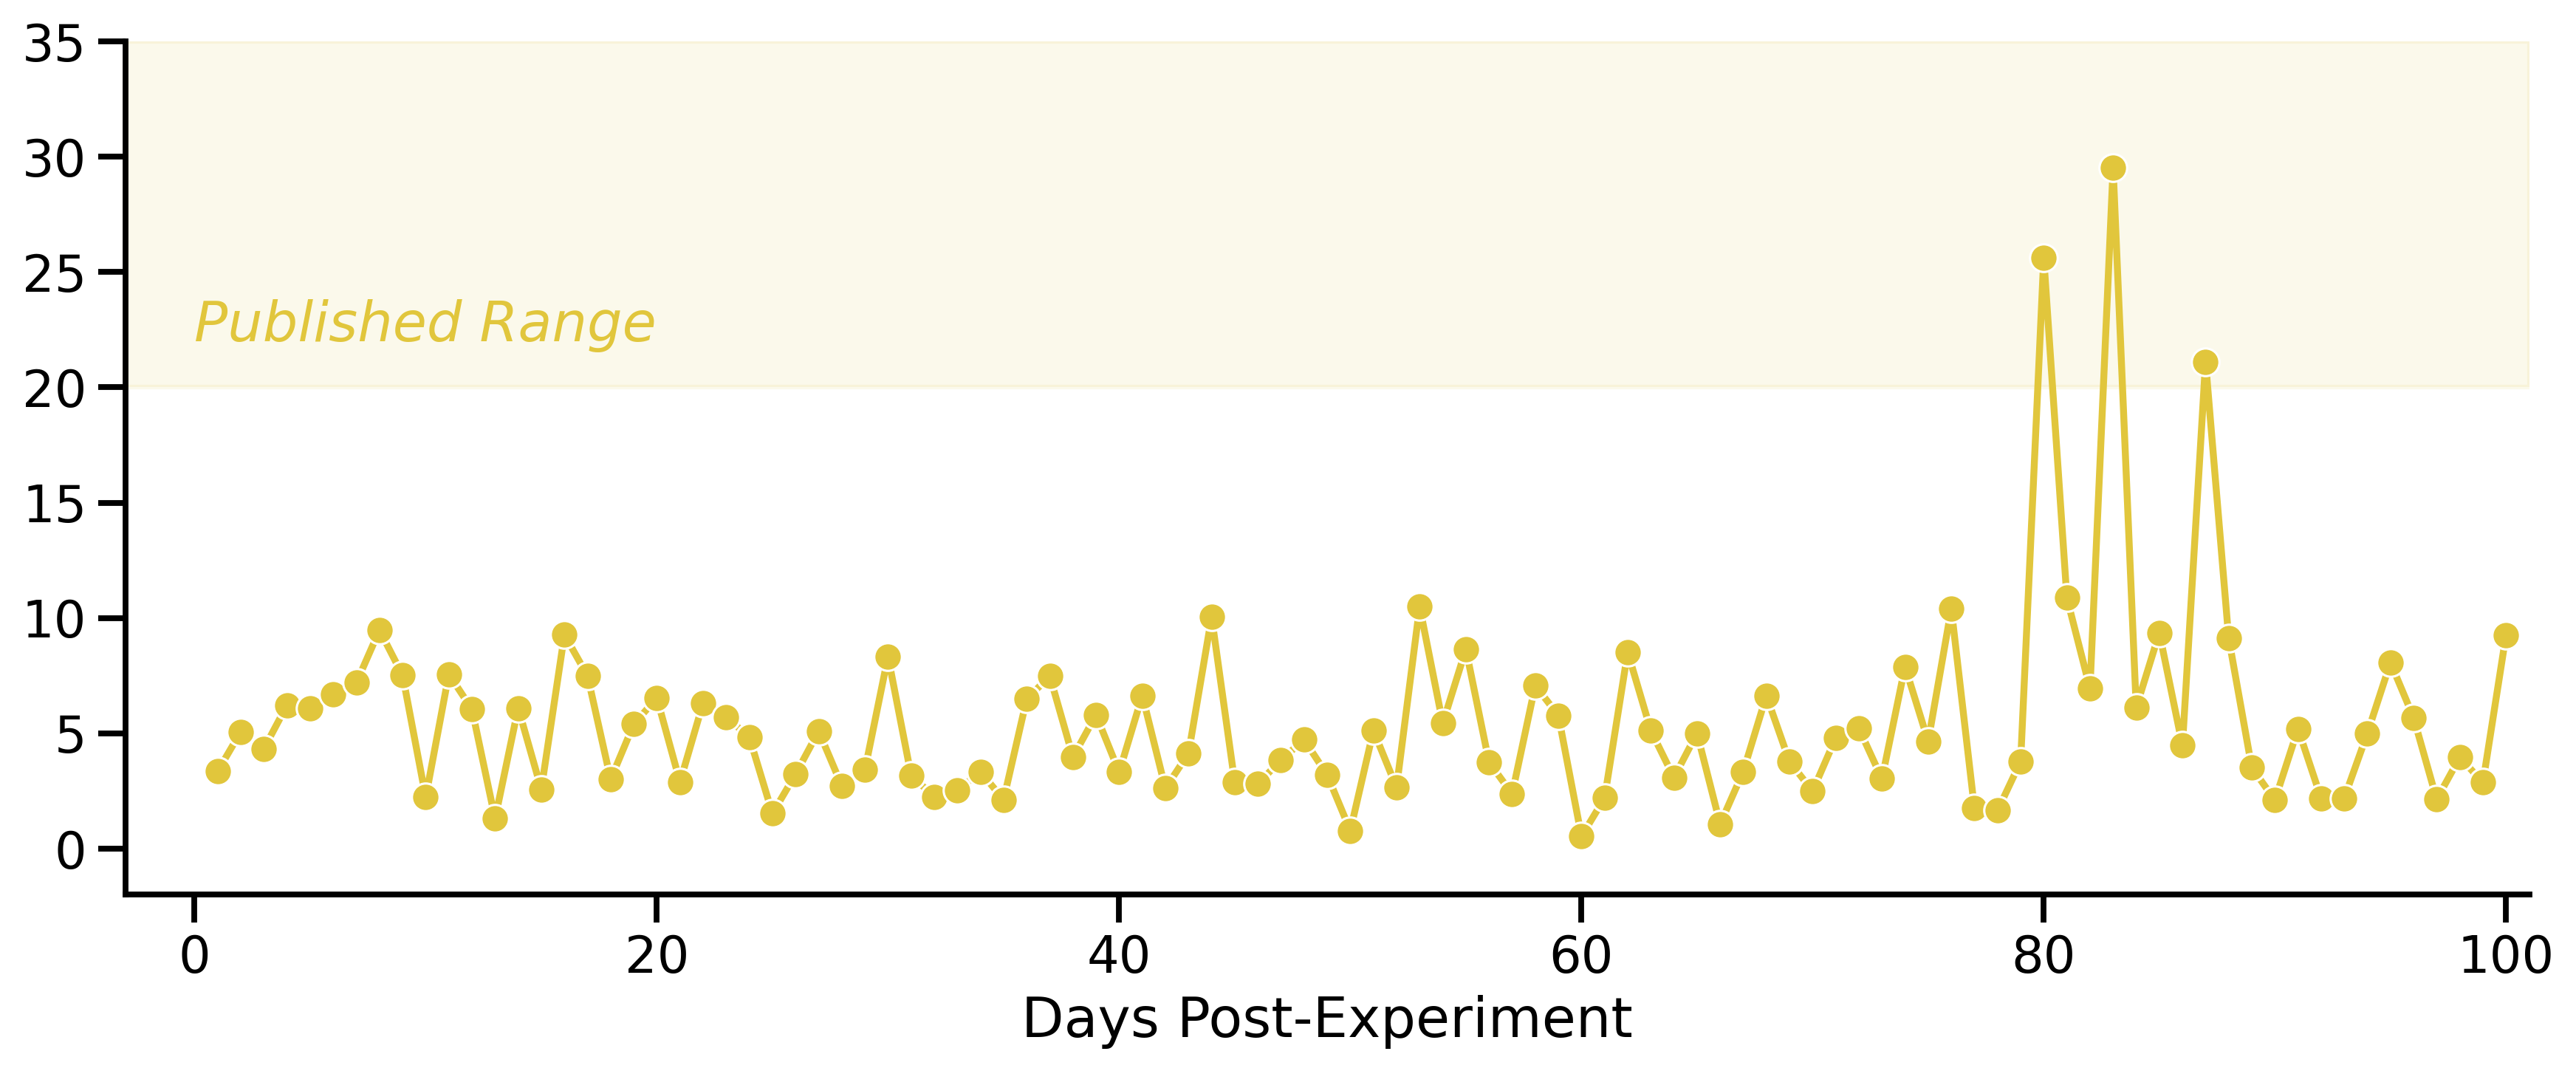

In [120]:

fig, ax = plt.subplots(figsize=(14, 5), dpi=300)
sns.lineplot(data=stage11_summary_df.query("animal_id == @c.DEMO_ANIMAL"), x="days_relative_to_stage_11_adj", y="violation_rate", ax=ax, errorbar="se", marker="o", color=c.VIOLATION_COLOR)

# ax.grid(True, alpha=0.5)

ax.set(
    xlabel="Days Post-Experiment",
    ylabel="",
    ylim=(-2, 35),
    xlim=(-3, 101)
)
ax.axhspan(20,35, color=c.VIOLATION_COLOR, alpha=0.1, zorder=0)
ax.text(0, 22, "Published Range", color= c.VIOLATION_COLOR, fontstyle='italic')

sns.despine()




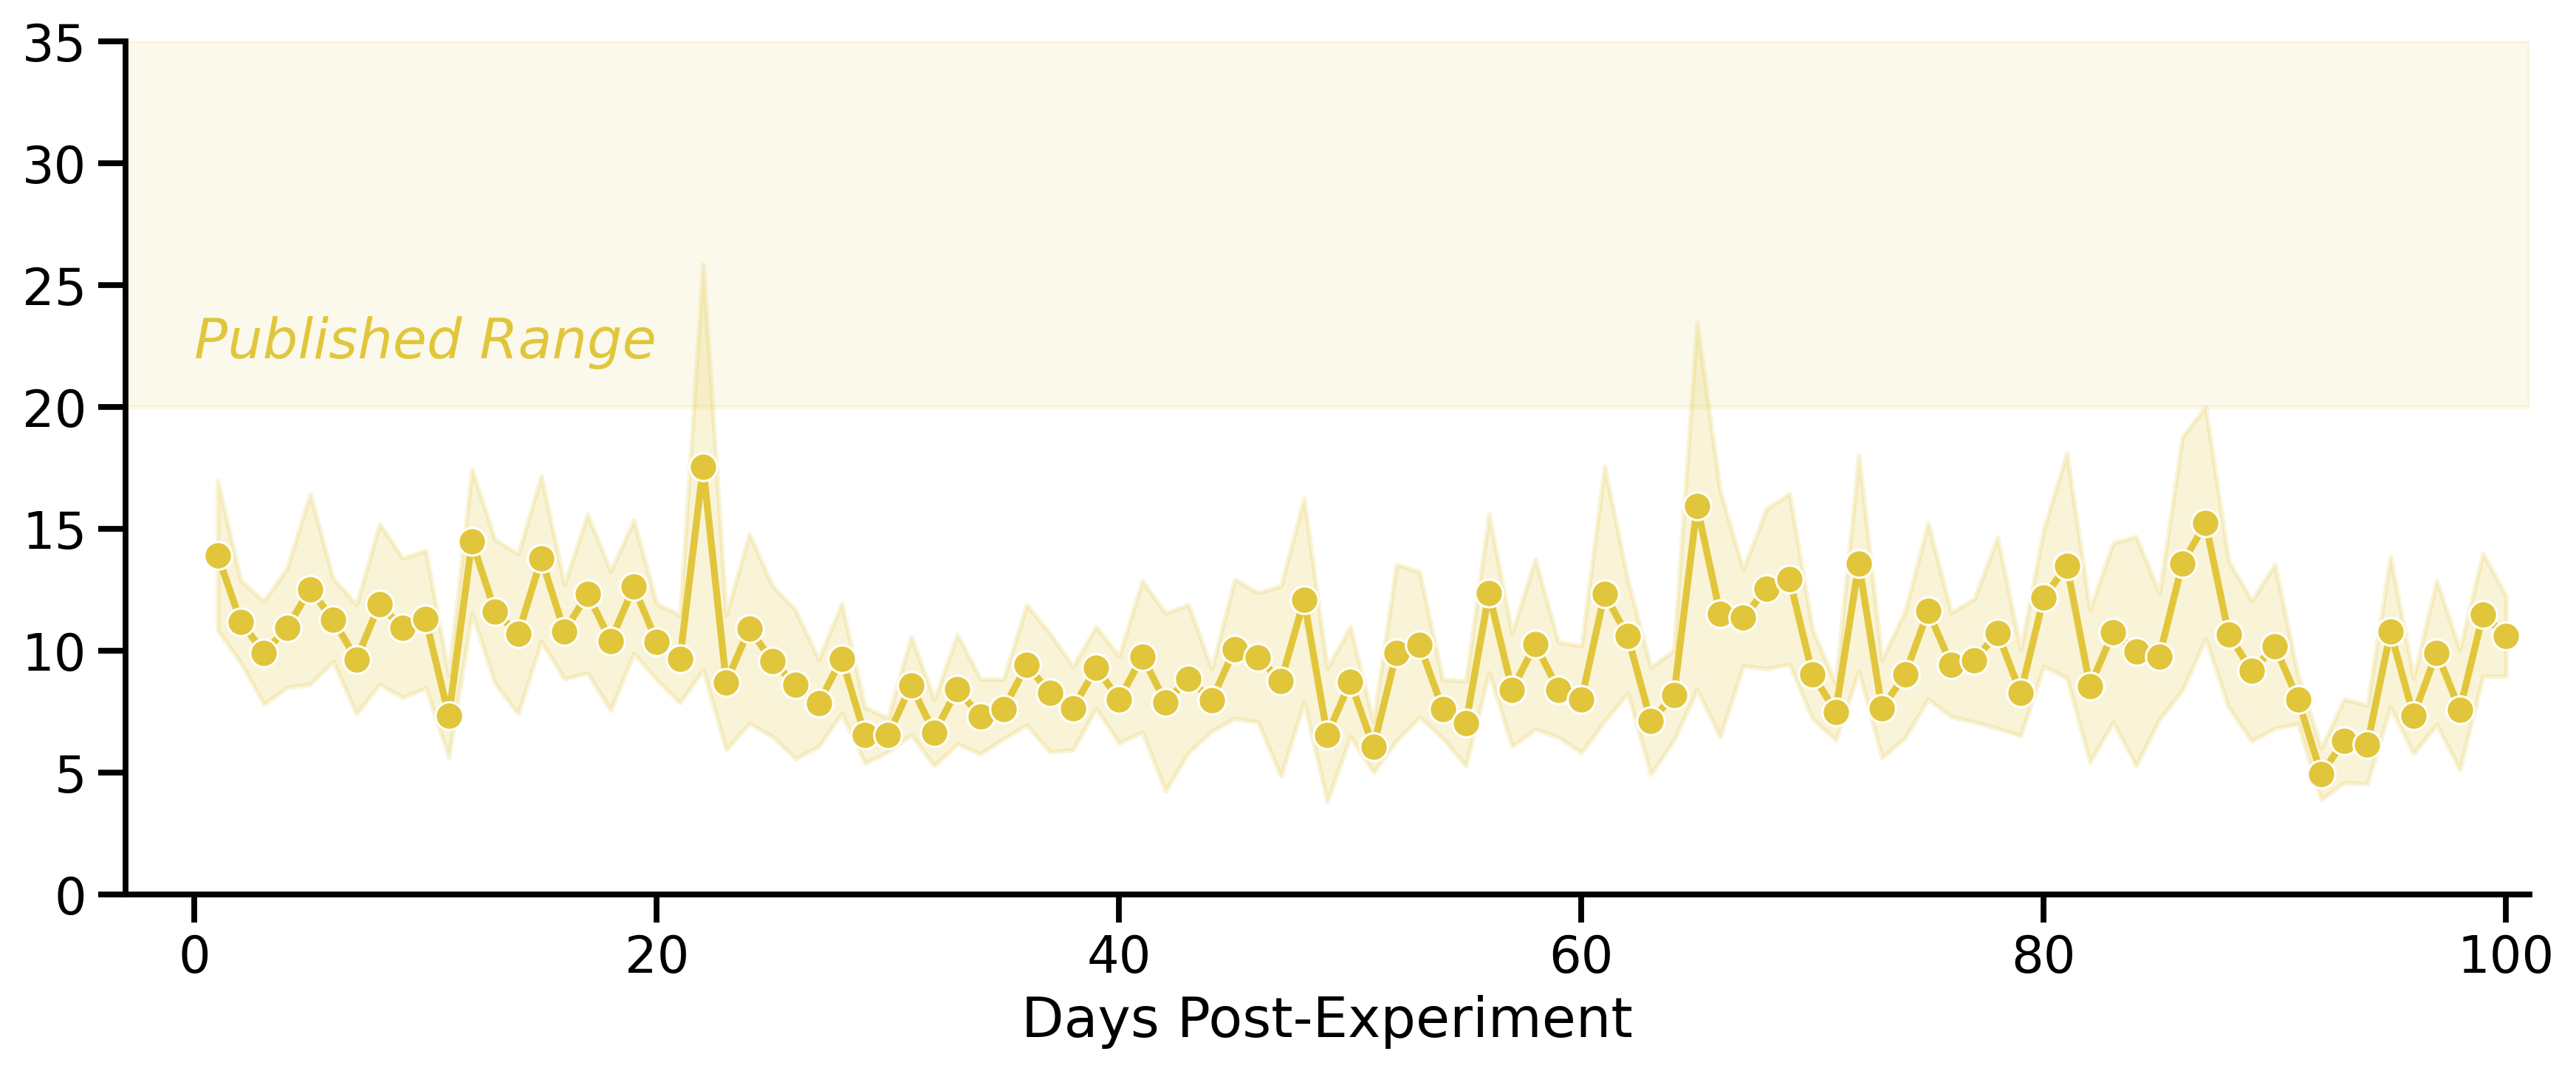

In [121]:

fig, ax = plt.subplots(figsize=(14, 5), dpi=300)
sns.lineplot(data=stage11_summary_df, x="days_relative_to_stage_11_adj", y="violation_rate", ax=ax, errorbar="se", marker="o", color=c.VIOLATION_COLOR)

# ax.grid(True, alpha=0.5)

ax.set(
    xlabel="Days Post-Experiment",
    ylabel="",
    ylim=(0, 35),
    xlim=(-3,101)
)

ax.axhspan(20,35, color=c.VIOLATION_COLOR, alpha=0.1, zorder=0)
ax.text(0, 22, "Published Range", color= c.VIOLATION_COLOR, fontstyle='italic')

# ax.set_title("Violation Rate Post-Probe Stages", fontweight="bold")

sns.despine()





## 1.3 Summary


In [64]:
sumary_by_animal = stage11_summary_df.groupby("animal_id").violation_rate.mean().reset_index()

/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_74444/2579458208.py:5: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(


[Text(0, 0.5, ''), (0.0, 35.0), []]

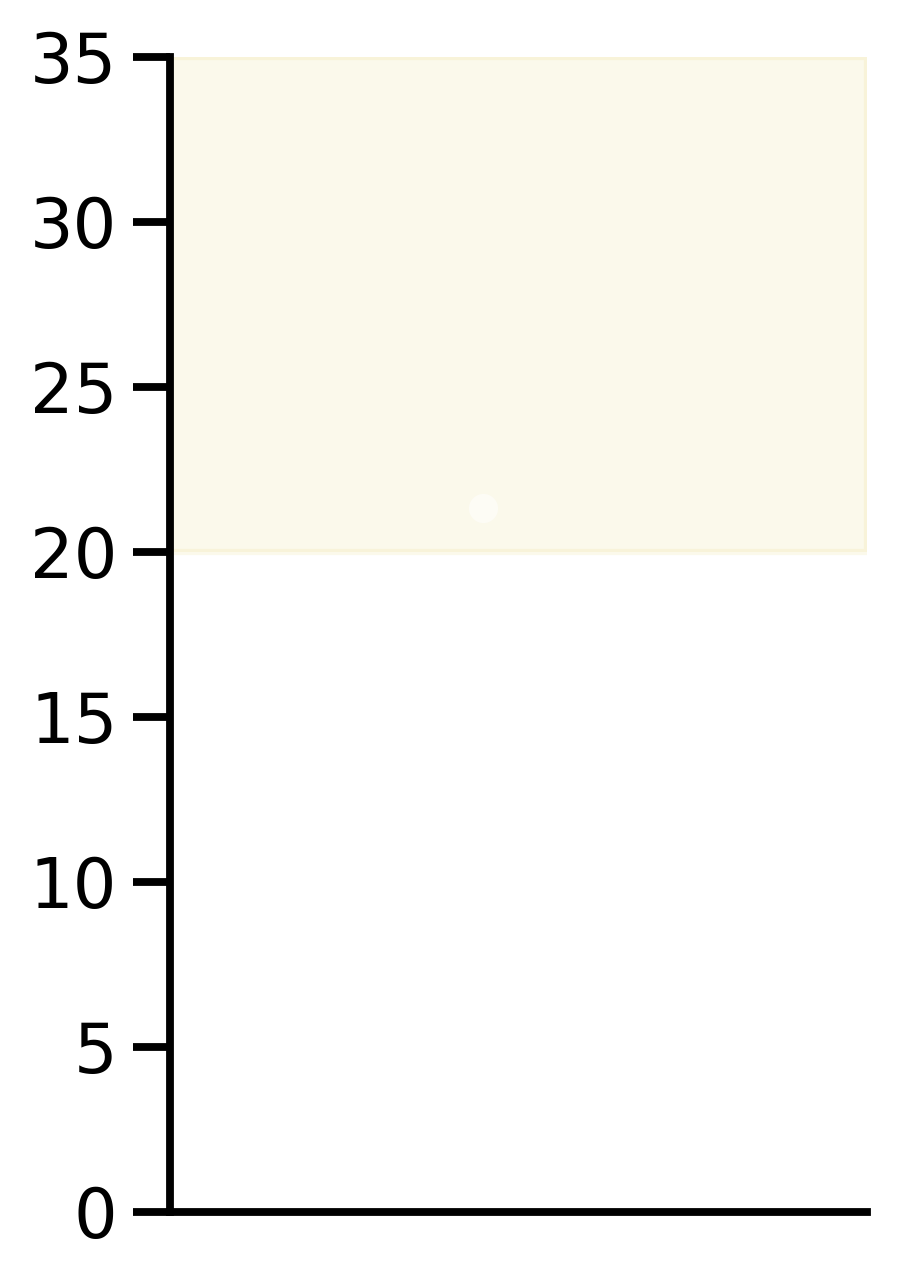

In [122]:
fig, ax = plt.subplots(figsize=(3,5), dpi=300)
sns.despine()


sns.pointplot(
    y="violation_rate",
    data=stage11_summary_df,
    ax=ax,
    color="white",
    # legend=False,
    # alpha=0.25,
    zorder=10,
    errorbar="se",
    scale=1.5,  # Use 'scale' to make the points bigger
)

sns.stripplot(
    y="violation_rate",
    data=sumary_by_animal,
    ax=ax,
    color="white",
    legend=False,
    alpha=0.5,
    s= 7,
)
ax.axhspan(20,35, color=c.VIOLATION_COLOR, alpha=0.1, zorder=0)

ax.set(
    ylabel="",
    ylim=(0, 35),
    xticks=[]
)


/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_74444/2835870979.py:5: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(


[Text(0, 0.5, ''), (0.0, 35.0), []]

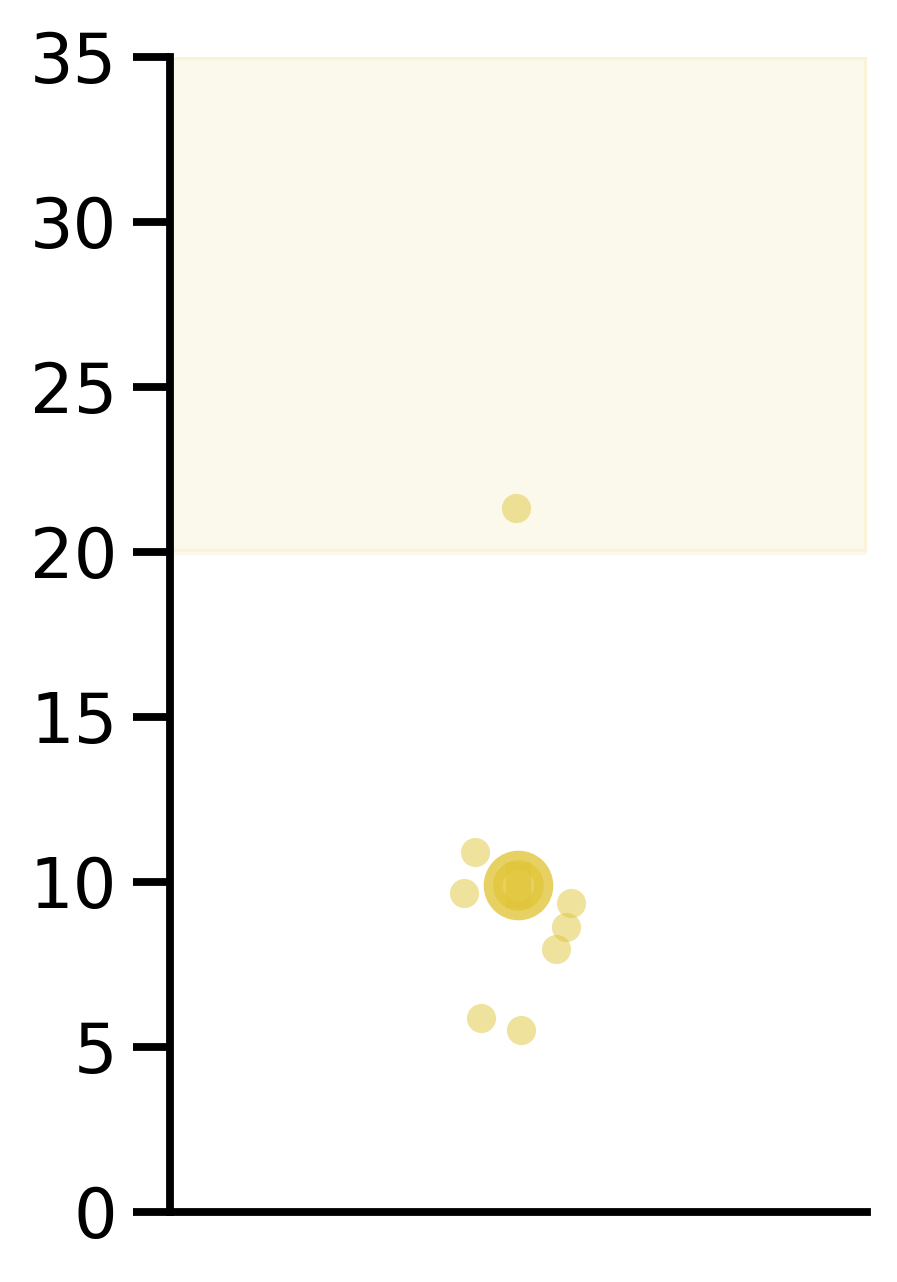

In [163]:
fig, ax = plt.subplots(figsize=(3,5), dpi=300)
sns.despine()


sns.pointplot(
    y="violation_rate",
    data=stage11_summary_df,
    ax=ax,
    color=c.VIOLATION_COLOR,
    # legend=False,
    # alpha=0.25,
    zorder=10,
    errorbar="se",
    scale=1.5,  # Use 'scale' to make the points bigger
    alpha=0.8
)

sns.stripplot(
    y="violation_rate",
    data=sumary_by_animal,
    ax=ax,
    color=c.VIOLATION_COLOR,
    legend=False,
    alpha=0.5,
    s= 7,
)
ax.axhspan(20,35, color=c.VIOLATION_COLOR, alpha=0.1, zorder=0)

ax.set(
    ylabel="",
    ylim=(0, 35),
    xticks=[]
)


In [125]:
sumary_by_animal.violation_rate.mean()

np.float64(9.89677880262905)

# 2. Species


## 2.1 Load


In [148]:
tdf = pd.read_parquet("data/MouseFixation_tdf.parquet")
g_tdf = tdf.query("stage in @c.GROWING_STAGES and days_relative_to_stage_5 >= 0").copy()
days_to_target_df = pd.read_csv("data/MouseFixation_days_to_target.csv")
fix_target_df= pd.read_csv("data/MouseFixation_fix_target_df.csv")

v_tdf = u.compute_days_relative_to_stage(tdf.query("stage == 8").copy(), stage = 8)

In [150]:
v_tdf.columns

Index(['trial', 'animal_id', 'date', 'sess_id', 'protocol', 'result', 'hits',
       'violations', 'temperror', 'hit_rate', 'error_rate', 'violation_rate',
       'temp_error_rate', 'n_lpokes', 'n_cpokes', 'n_rpokes', 'trial_dur',
       'trial_start', 'valid_early_spoke', 'first_spoke', 'first_lpoke',
       'first_rpoke', 'n_settling_ins', 'avg_settling_in', 'cpoke_dur',
       'stage', 'curriculum', 'sides', 'SMA_set', 'is_match', 'sa', 'sb',
       'stimuli_on', 'settling_in_dur', 'legal_cbreak_dur', 'pre_dur',
       'adj_pre_dur', 'stimulus_dur', 'delay_dur', 'post_dur', 'sb_extra_dur',
       'viol_off_dur', 'pre_go_dur', 'inter_trial_dur', 'go_type', 'go_dur',
       'give_type_set', 'give_type_imp', 'give_frac', 'give_delay_dur',
       'give_xtra_light_delay_dur', 'give_use', 'replay_on', 'timeouts',
       'water_delivered', 'give_water_not_drunk', 'crash_hist',
       'was_block_swtich', 'l_water_vol', 'r_water_vol', 'ab_l_prob',
       'ab_r_prob', 'ab_beta', 'ab_tau', 'ex

In [156]:
v_tdf = u.compute_days_relative_to_stage(tdf.query("stage == 8").copy(), stage=8)
viol_session_df = (
    v_tdf.groupby(['animal_id', 'dt_date', 'days_relative_to_stage_8'])
    .agg(pct_viol=('violations', lambda x: x.mean() * 100))
    .reset_index()
)
by_animal_df = (
    viol_session_df.query("days_relative_to_stage_8 > 0")
    .groupby("animal_id", as_index=False)
    .pct_viol.mean()
)

## 2.2 Over days


[Text(0.5, 0, 'Days in FixGrower'),
 Text(0, 0.5, 'Fixation Duration (s)'),
 (0.0, 1.5)]

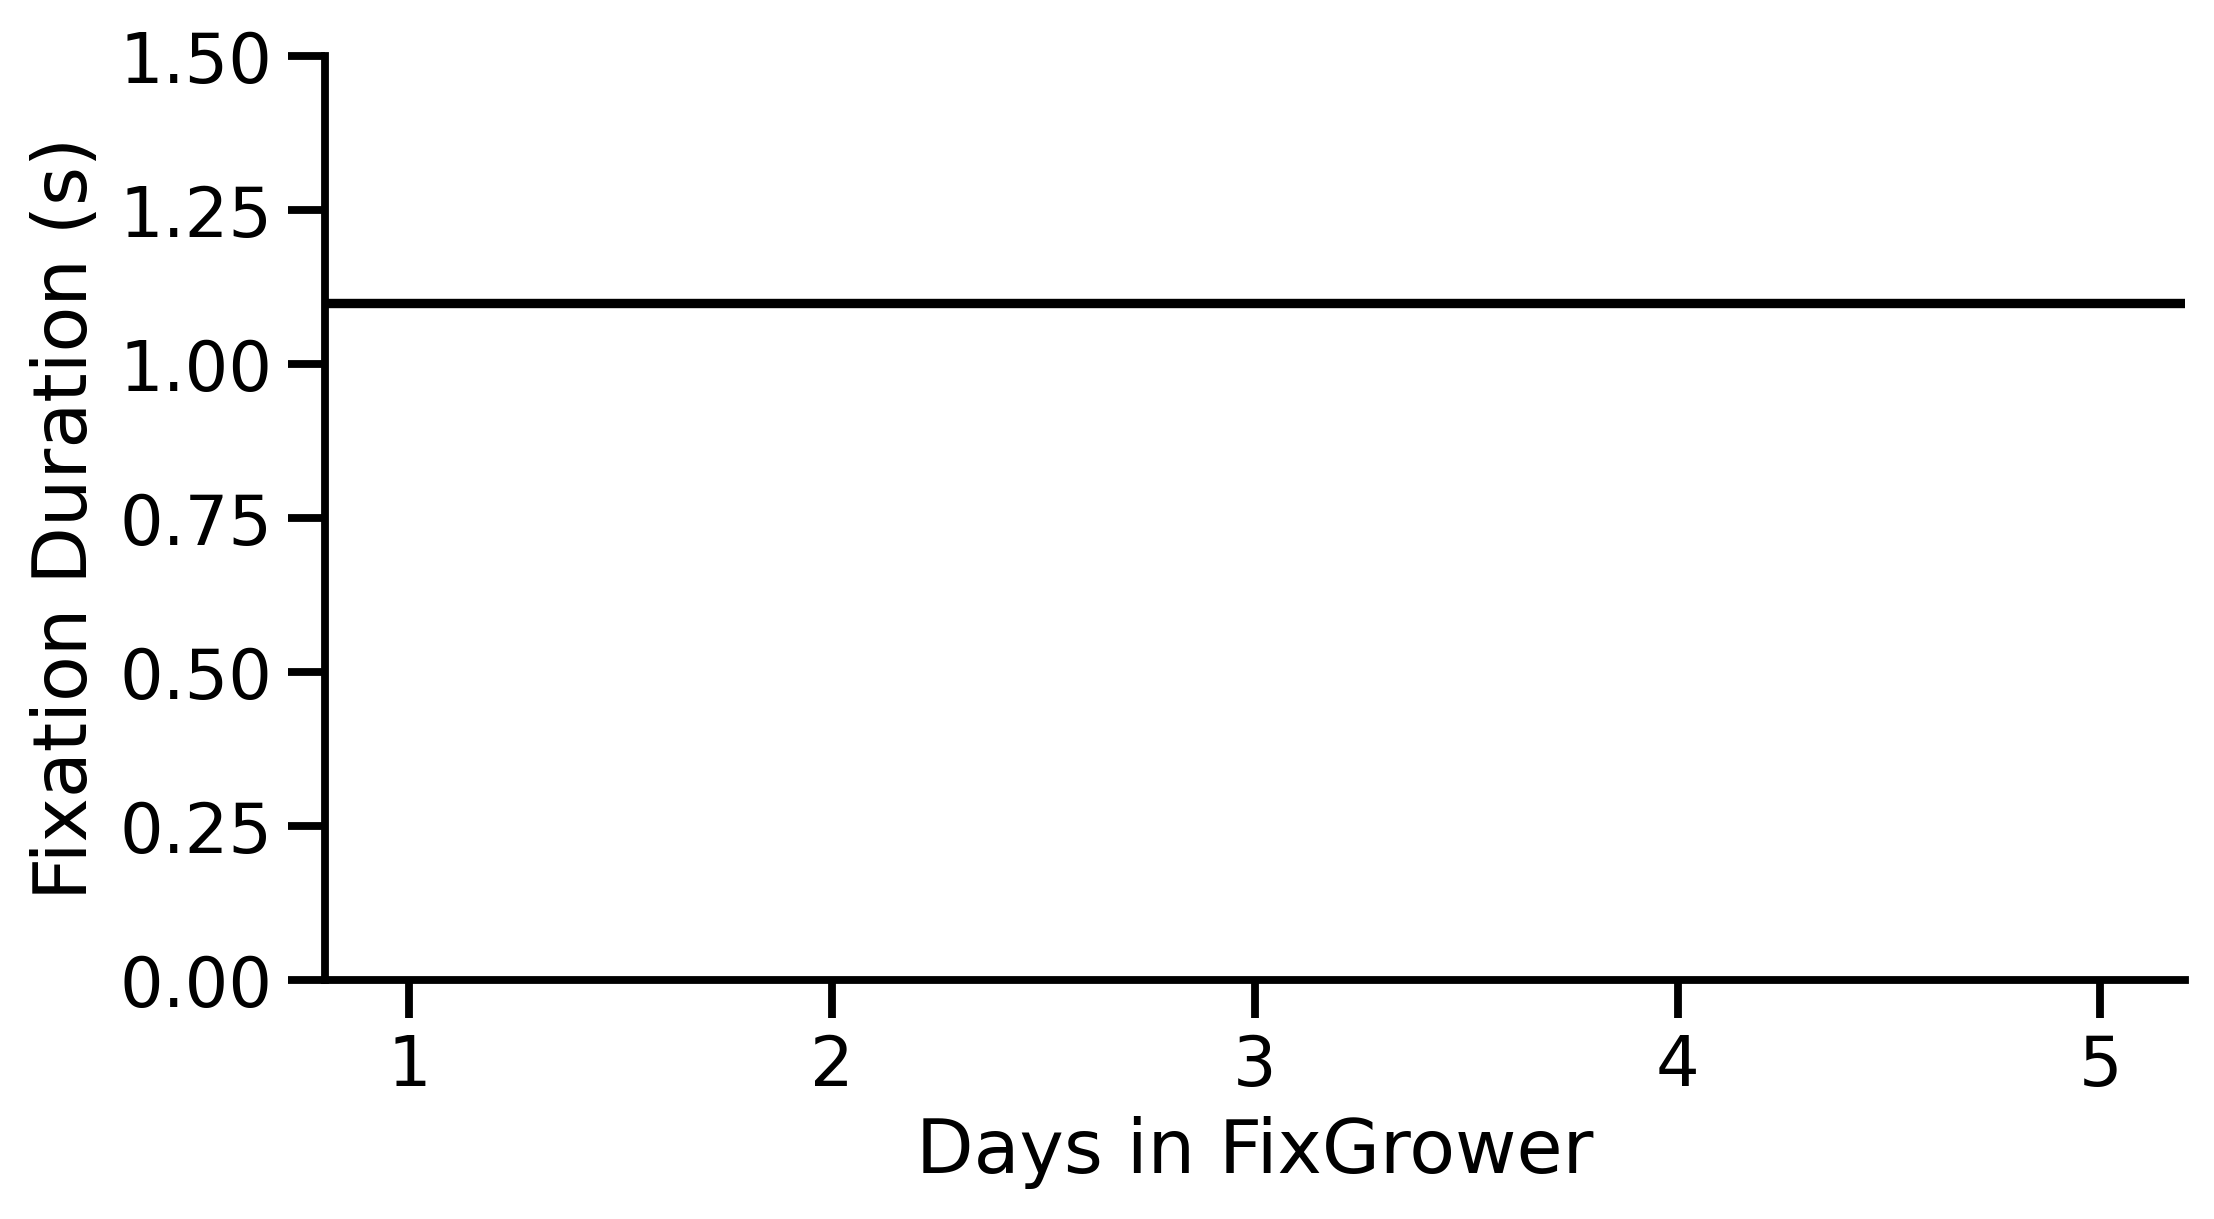

In [157]:
THRESHOLD = 1.1

fig, ax = plt.subplots(figsize=(8, 4), dpi=300)
sns.despine(ax=ax)


ax.axhline(THRESHOLD, color="black", zorder=10)
sns.lineplot(
    data=fix_target_df,
    x="days_relative_to_stage_5_adj",
    y="fixation_dur",
    style="animal_id",
    color="white",
    marker="o",
    estimator="max",
    alpha=0.75,
)

#set x ticks to be 1-5
ax.set_xticks([1, 2, 3, 4, 5])
ax.legend().remove()

ax.set(xlabel="Days in FixGrower", ylabel="Fixation Duration (s)", ylim=(0, 1.5))


[Text(0.5, 0, 'Days in FixGrower'),
 Text(0, 0.5, 'Fixation Duration (s)'),
 (0.0, 1.5)]

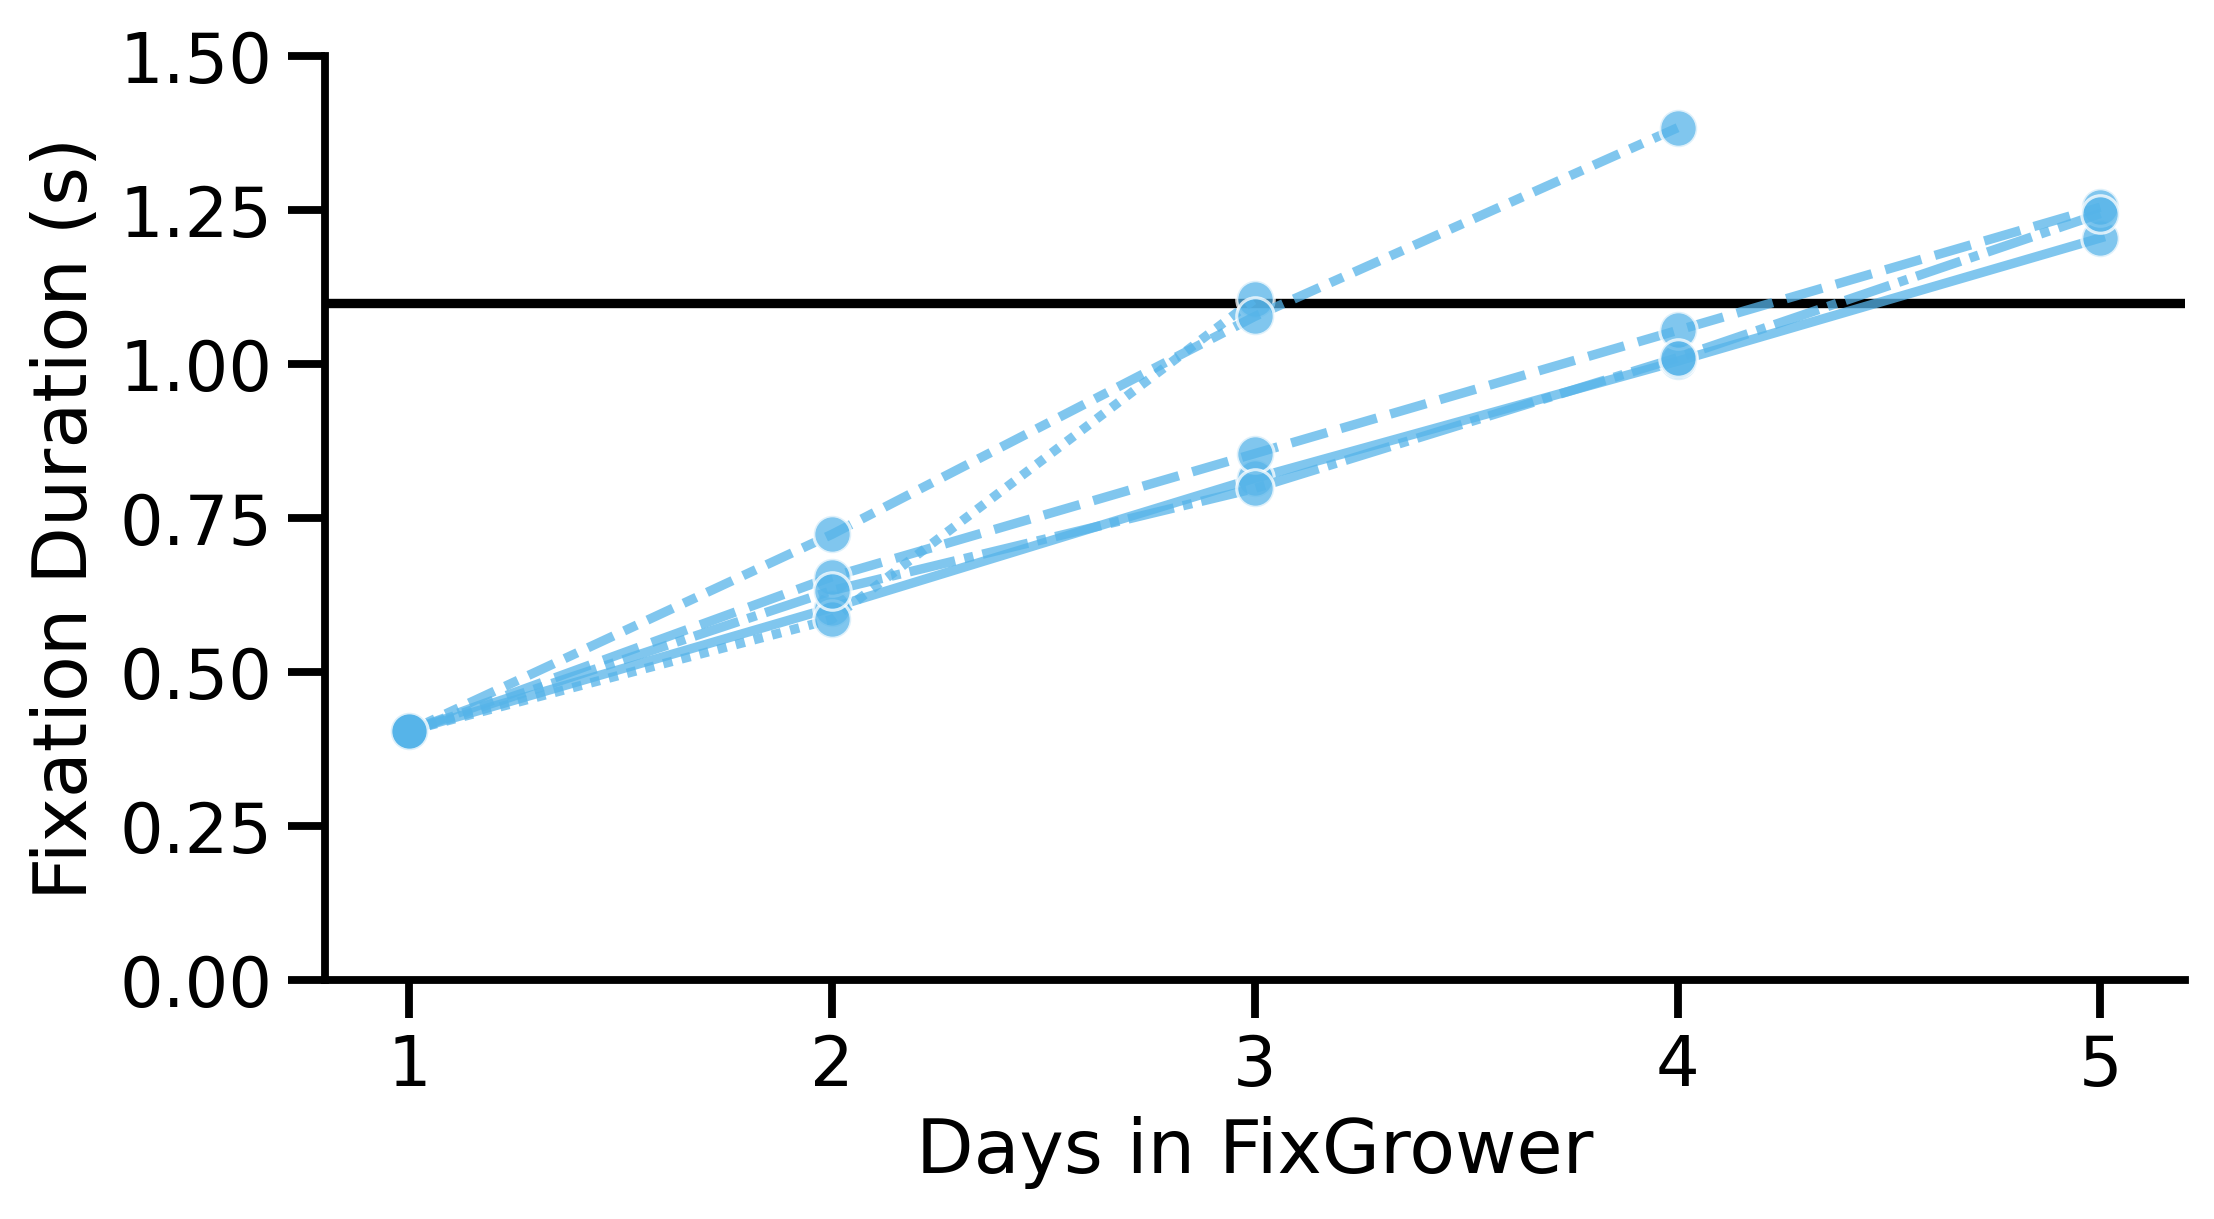

In [164]:

fig, ax = plt.subplots(figsize=(8, 4), dpi=300)
sns.despine(ax=ax)


ax.axhline(THRESHOLD, color="black", zorder=0)
sns.lineplot(
    data=fix_target_df,
    x="days_relative_to_stage_5_adj",
    y="fixation_dur",
    style="animal_id",
    color=c.V2_COLOR,
    marker="o",
    estimator="max",
    alpha=0.75,
)

#set x ticks to be 1-5
ax.set_xticks([1, 2, 3, 4, 5])
ax.legend().remove()

ax.set(xlabel="Days in FixGrower", ylabel="Fixation Duration (s)", ylim=(0, 1.5))


## 2.3 Summary


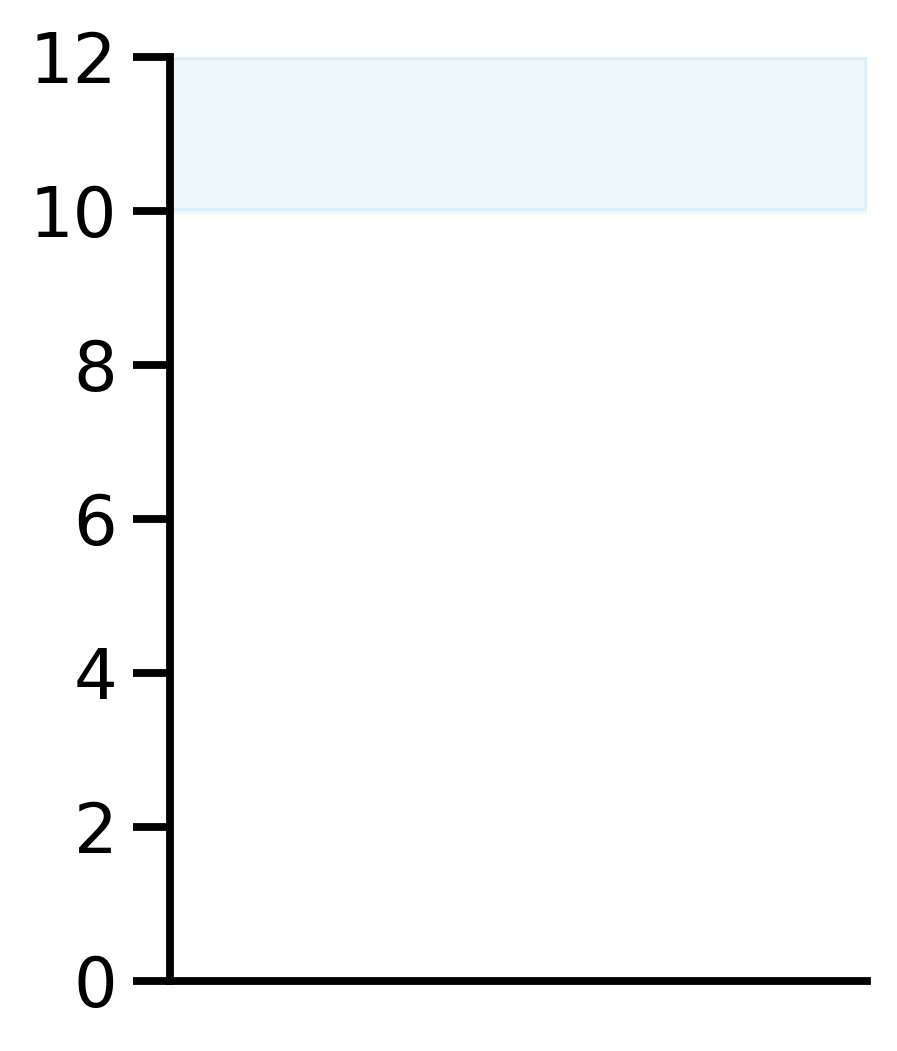

In [165]:
fig, ax = plt.subplots(figsize=(3, 4), dpi=300)
sns.despine(ax=ax)
# sns.pointplot(data=days_to_target_df, y="n_days_fix_target", color=c.MOUSE_COLOR, ax=ax,zorder=10, errorbar="se")
# sns.stripplot(data=days_to_target_df, y="n_days_fix_target", color=c.MOUSE_COLOR, ax=ax, alpha=0.5, jitter=0.05, s=7)
ax.set(xlabel="", ylabel="", ylim=(0,12))
ax.set(xticks=[])

ax.axhspan(10, 12, color=c.V2_COLOR, alpha=0.1)

stats = days_to_target_df['n_days_fix_target'].agg(['median', 'mean', 'std', 'size', 'min', 'max']).reset_index()


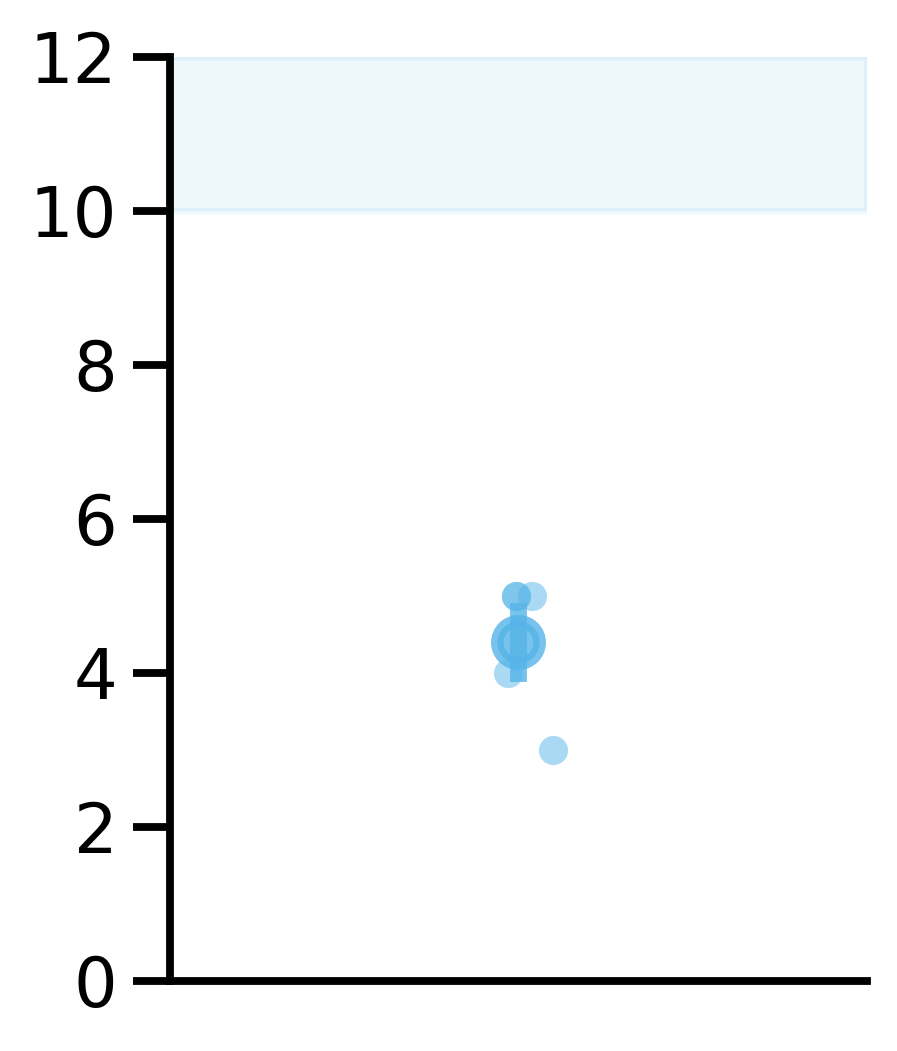

In [166]:
fig, ax = plt.subplots(figsize=(3, 4), dpi=300)
sns.despine(ax=ax)
sns.pointplot(data=days_to_target_df, y="n_days_fix_target", color=c.V2_COLOR, ax=ax,zorder=10, errorbar="se", alpha=0.8)
sns.stripplot(data=days_to_target_df, y="n_days_fix_target", color=c.V2_COLOR, ax=ax, alpha=0.5, jitter=0.05, s=7)
ax.set(xlabel="", ylabel="", ylim=(0,12))
ax.set(xticks=[])

ax.axhspan(10, 12, color=c.V2_COLOR, alpha=0.1)

stats = days_to_target_df['n_days_fix_target'].agg(['median', 'mean', 'std', 'size', 'min', 'max']).reset_index()


## Violation Rates


In [ ]:
viol_session_df = v_tdf.query("stage == 8").groupby(['animal_id', 'dt_date']).agg({'violations':'mean'}).reset_index()
by_animal_df = viol_session_df.query("days_relative_to_stage_8 > 0").groupby("animal_id").pct_viol.mean().reset_index()

/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_74444/2712225066.py:4: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(


[Text(0, 0.5, ''), (0.0, 35.0), []]

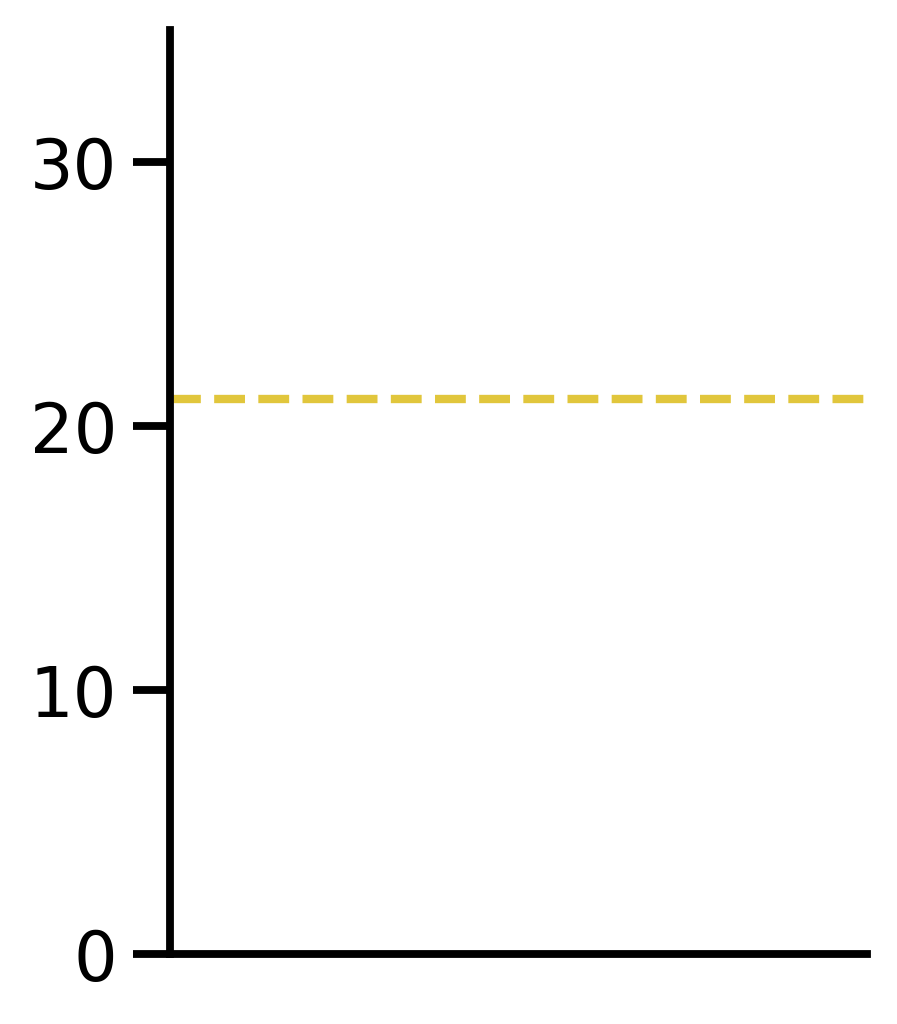

In [213]:
fig, ax = plt.subplots(figsize=(3,4), dpi=300)
sns.despine()

sns.pointplot(
    y="pct_viol",
    data=by_animal_df,
    ax=ax,
    color="white",  # Changed color to white
    zorder=10,
    errorbar="se",
    scale=1.5,  # Use 'scale' to make the points bigger
)

sns.stripplot(
    y="pct_viol",
    data=by_animal_df,
    ax=ax,
    color="white",  # Changed color to white
    legend=False,
    alpha=0.5,
    s= 7,
)

ax.axhline(21, color=c.VIOLATION_COLOR, lw=2, ls="--")
ax.set(
    ylabel="",
    ylim=(0, 35),
    xticks=[]
)


In [215]:
by_animal_df.pct_viol.mean()

np.float64(17.553149595973004)

/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_74444/2785583164.py:5: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(


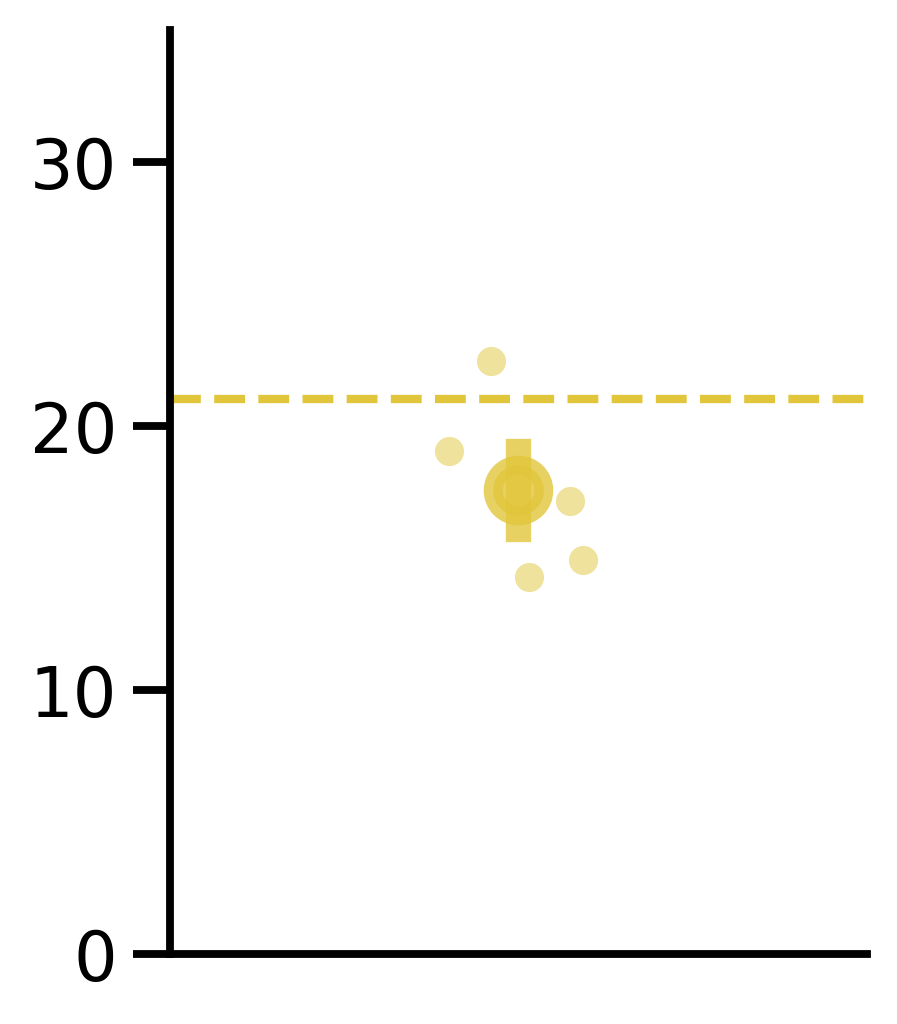

In [214]:
fig, ax = plt.subplots(figsize=(3,4), dpi=300)
sns.despine()


sns.pointplot(
    y="pct_viol",
    data=by_animal_df,
    ax=ax,
    color=c.VIOLATION_COLOR,
    zorder=10,
    errorbar="se",
    scale=1.5,  # Use 'scale' to make the points bigger
    alpha=0.8
)

sns.stripplot(
    y="pct_viol",
    data=by_animal_df,
    ax=ax,
    color=c.VIOLATION_COLOR,
    legend=False,
    alpha=0.5,
    s= 7,
)
ax.set(
    ylabel="",
    ylim=(0, 35),
    xticks=[]
)
ax.axhline(21, color=c.VIOLATION_COLOR, lw=2, ls="--")



# 3. Task


## 3.1 Load


In [127]:
summary_df = pd.read_csv("data/DMStask_cleaned_summary_perf_df.csv")
summary_df.head()

,animal_id,dt_date,violations,hits,trial,pct_correct,pct_viol
0,R010,2023-10-22,0.051724,0.872727,58,87.272727,5.172414
1,R010,2023-10-23,0.051282,0.790541,156,79.054054,5.128205
2,R010,2023-10-24,0.066667,0.824675,165,82.467532,6.666667
3,R010,2023-10-25,0.060345,0.844037,116,84.403670,6.034483
4,R010,2023-10-26,0.021898,0.858209,138,85.820896,2.189781


In [129]:
summary_df_by_animal = summary_df.groupby("animal_id").agg(
    pct_correct_mean=("pct_correct", "mean"),
    pct_viol_mean=("pct_viol", "mean")
)

## 3.2 Hit Rate


In [135]:
hit_color = "#92D050"

/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_74444/1872899500.py:4: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(


,index,pct_correct
0,median,87.500000
1,mean,87.645900
2,std,5.892958
3,size,179.000000


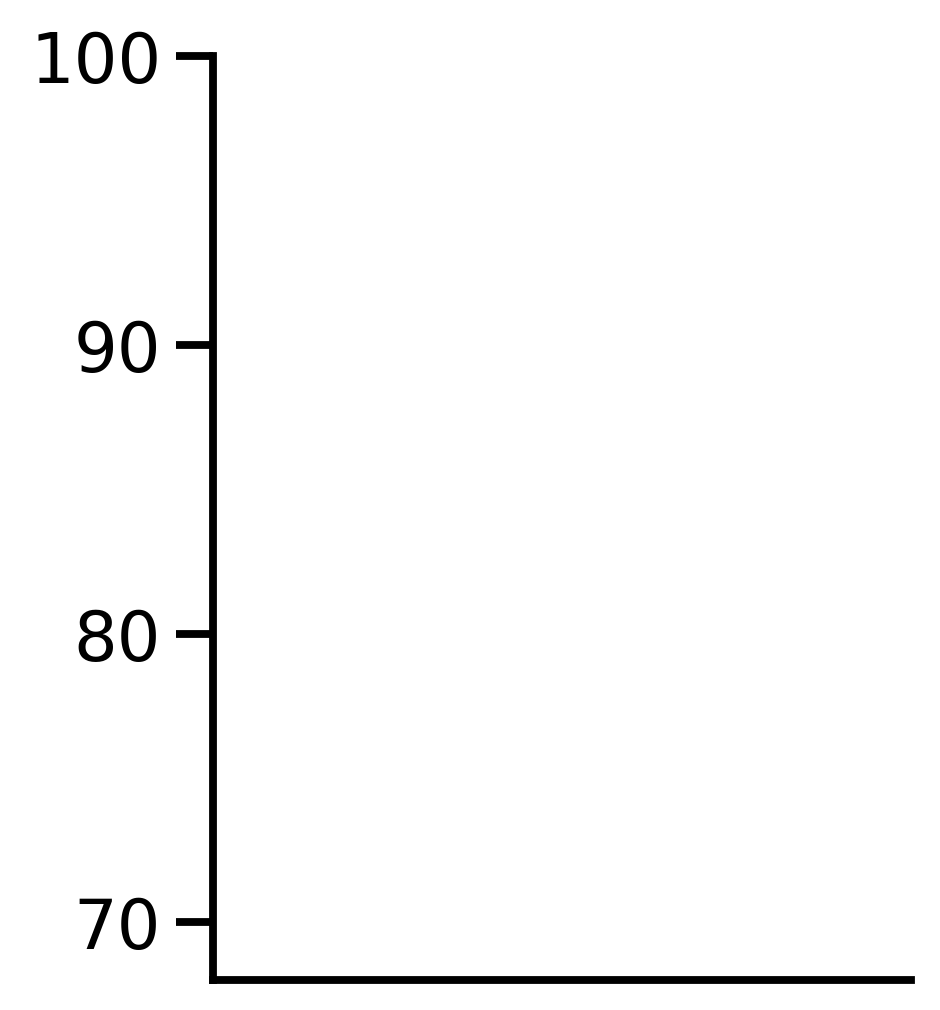

In [211]:
fig, ax = plt.subplots(figsize=(3, 4), dpi=300)
sns.despine(ax=ax)

sns.pointplot(
    y="pct_correct_mean",
    data=summary_df_by_animal,
    ax=ax,
    color="white",
    zorder=10,
    errorbar="se",
    scale=1.5,  # Use 'scale' to make the points bigger
    alpha=0.8
)
sns.stripplot(data=summary_df_by_animal, y="pct_correct_mean", color="white", ax=ax, s=7)

ax.set(xlabel="", ylabel="", ylim=(68,100))
ax.set(xticks=[])

stats = summary_df['pct_correct'].agg(['median', 'mean', 'std', 'size']).reset_index()
stats


In [217]:
len(summary_df_by_animal)

13

/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_74444/2186568922.py:4: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(


,index,pct_correct
0,median,87.500000
1,mean,87.645900
2,std,5.892958
3,size,179.000000


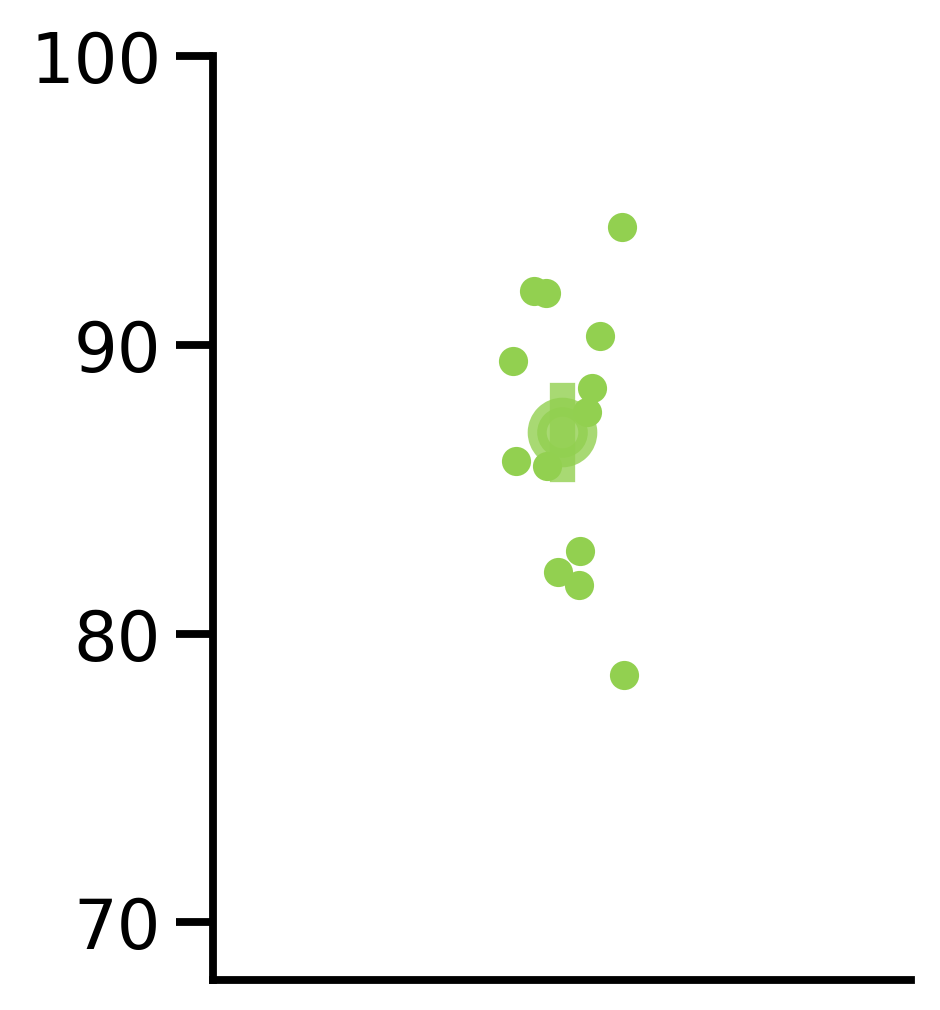

In [180]:
fig, ax = plt.subplots(figsize=(3, 4), dpi=300)
sns.despine(ax=ax)

sns.pointplot(
    y="pct_correct_mean",
    data=summary_df_by_animal,
    ax=ax,
    color=hit_color,
    zorder=10,
    errorbar="se",
    scale=1.5,  # Use 'scale' to make the points bigger
    alpha=0.8
)
sns.stripplot(data=summary_df_by_animal, y="pct_correct_mean", color=hit_color, ax=ax, s=7)

ax.set(xlabel="", ylabel="", ylim=(68,100))
ax.set(xticks=[])

stats = summary_df['pct_correct'].agg(['median', 'mean', 'std', 'size']).reset_index()
stats


## 3.3 Violation Rate


/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_74444/2381952723.py:4: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(


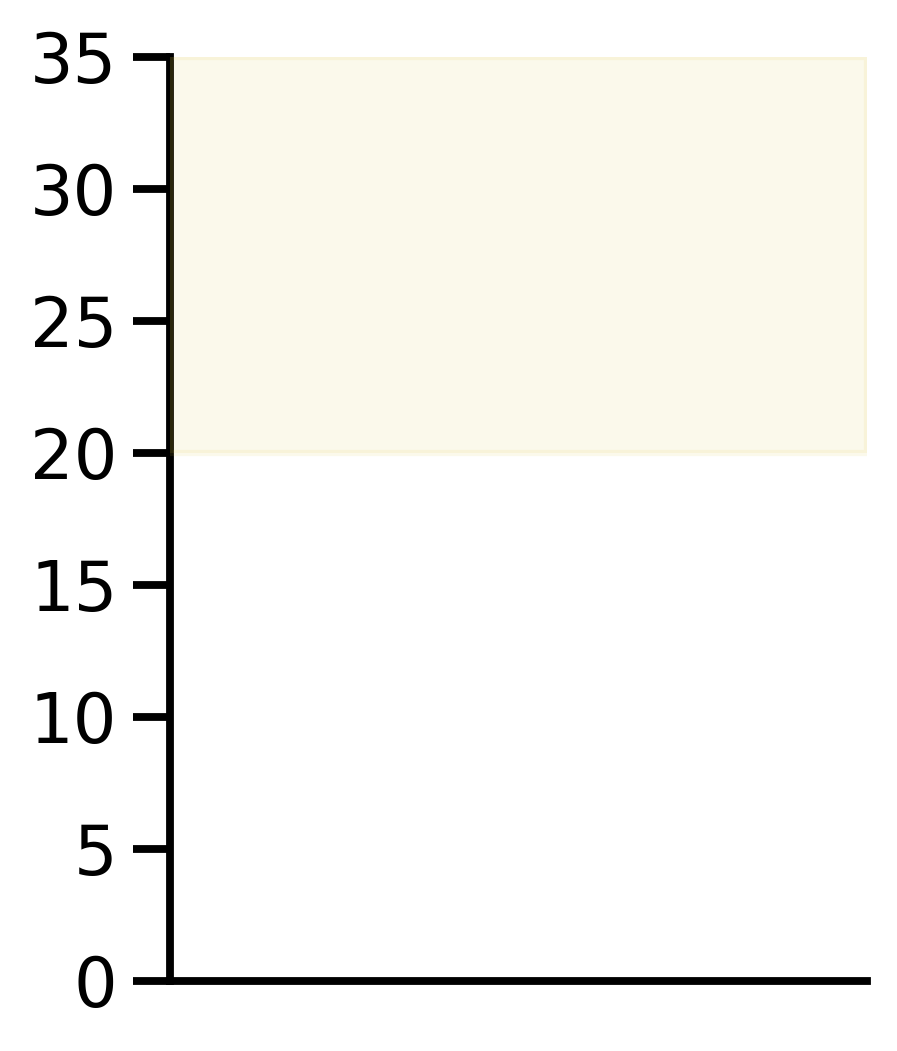

In [218]:
fig, ax = plt.subplots(figsize=(3, 4), dpi=300)
sns.despine(ax=ax)

sns.pointplot(
    y="pct_viol_mean",
    data=summary_df_by_animal,
    ax=ax,
    color="white",
    zorder=10,
    errorbar="se",
    scale=1.5,  # Use 'scale' to make the points bigger
    alpha=0.8
)
sns.stripplot(data=summary_df_by_animal, y="pct_viol_mean", color="white", ax=ax, s=7)

ax.set(xlabel="", ylabel="", ylim=(0, 35), yticks=range(0, 36, 5))
ax.set(xticks=[])

stats = summary_df['pct_viol'].agg(['median', 'mean', 'std', 'size']).reset_index()
stats
ax.axhspan(20,35, color=c.VIOLATION_COLOR, alpha=0.1, zorder=10)



/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_74444/3459167248.py:4: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(


,index,pct_viol
0,median,7.625219
1,mean,9.033600
2,std,7.067985
3,size,158.000000


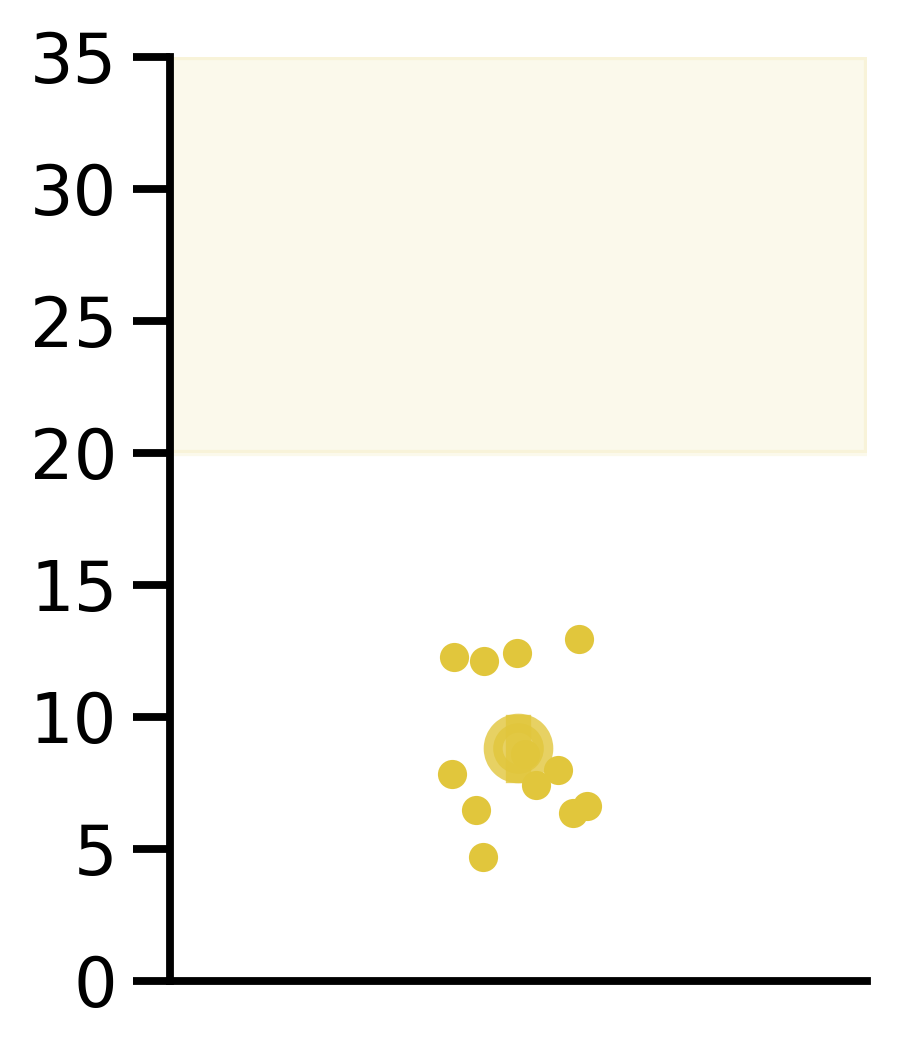

In [240]:
fig, ax = plt.subplots(figsize=(3, 4), dpi=300)
sns.despine(ax=ax)

sns.pointplot(
    y="pct_viol_mean",
    data=summary_df_by_animal.query("animal_id != 'R027'"),
    ax=ax,
    color=c.VIOLATION_COLOR,
    zorder=10,
    errorbar="se",
    scale=1.5,  # Use 'scale' to make the points bigger
    alpha=0.8
)
sns.stripplot(data=summary_df_by_animal.query("animal_id != 'R027'"), y="pct_viol_mean", color=c.VIOLATION_COLOR, ax=ax, s=7)

ax.set(xlabel="", ylabel="", ylim=(0,35))
ax.set(xticks=[])
ax.axhspan(20,35, color=c.VIOLATION_COLOR, alpha=0.1, zorder=0)

ax.set(xlabel="", ylabel="", ylim=(0, 35), yticks=range(0, 36, 5))
ax.set(xticks=[])
stats = summary_df.query("animal_id != 'R027'")['pct_viol'].agg(['median', 'mean', 'std', 'size']).reset_index()
stats


## 3.4 Hit vs Viol


In [241]:
from scipy.stats import linregress

# 1. Compute per‐animal means
animal_avg = summary_df.query("animal_id != 'R027'").groupby('animal_id') \
                       .agg({'pct_correct':'mean', 'pct_viol':'mean'}) \
                       .reset_index()

# 2. Do the linear regression
x = animal_avg['pct_correct']
y = animal_avg['pct_viol']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
r2 = r_value**2

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R²: {r2:.4f}")

# 3. Prepare line for plotting
x_vals = np.linspace(73, 97, 100)
y_vals = intercept + slope * x_vals


Slope: 0.0729
Intercept: 2.4829
R²: 0.0139


[(0.0, 35.0), (70.0, 99.0)]

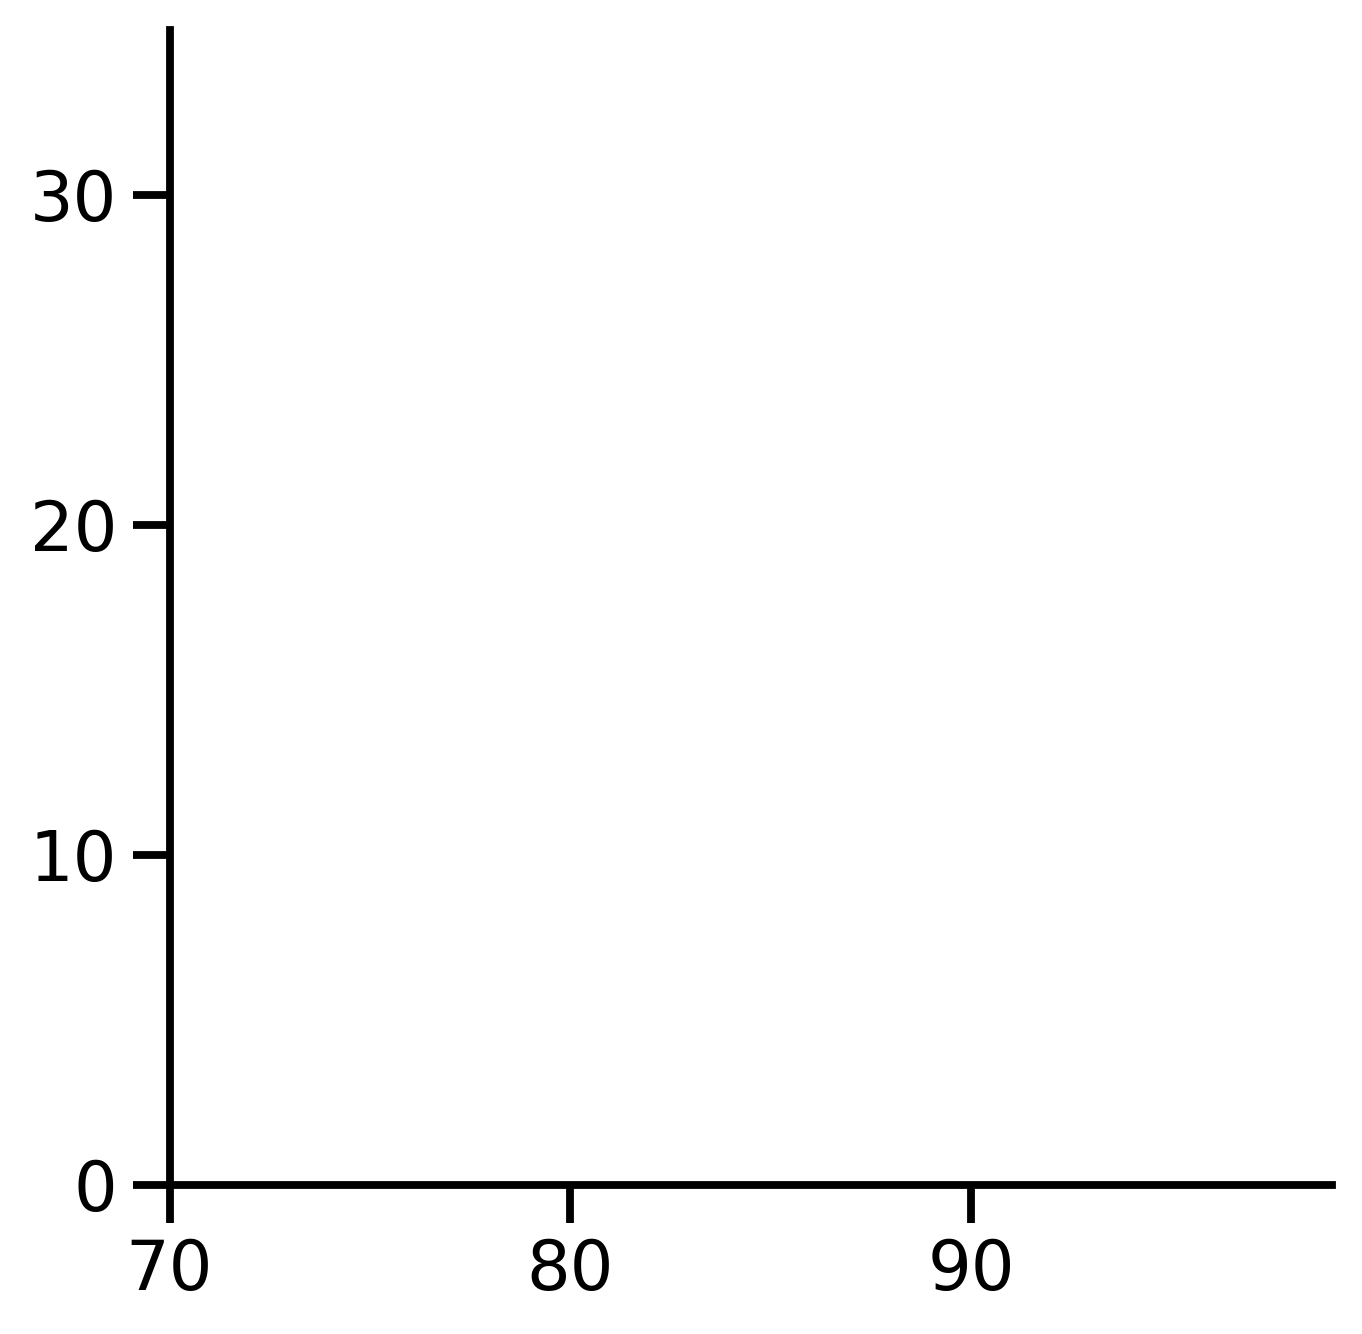

In [242]:

# 4. Plot scatter + regression line
fig, ax = plt.subplots(figsize=(5,5), dpi=300)
sns.despine()
sns.scatterplot(data=animal_avg, x='pct_correct', y='pct_viol', ax=ax, color="white", style="animal_id", s= 200)
ax.set(xlabel="", ylabel="")

ax.legend().remove()

# ax.plot(
#     x_vals, y_vals,
#     color='black', lw=3,
#     label=(
#         f"$R^2 = {r2:.2f}$"
#     )
# )
# ax.text(x=91, y=16, s=f"R²={r2:.2f}", fontsize=12, fontweight='bold')

# Set x-ticks to be every 10
ax.set_xticks(np.arange(70, 100, 10))
ax.set_yticks(np.arange(0, 40, 10))

ax.set(ylim=(0, 35), xlim=(70, 99))

[(0.0, 35.0), (70.0, 99.0)]

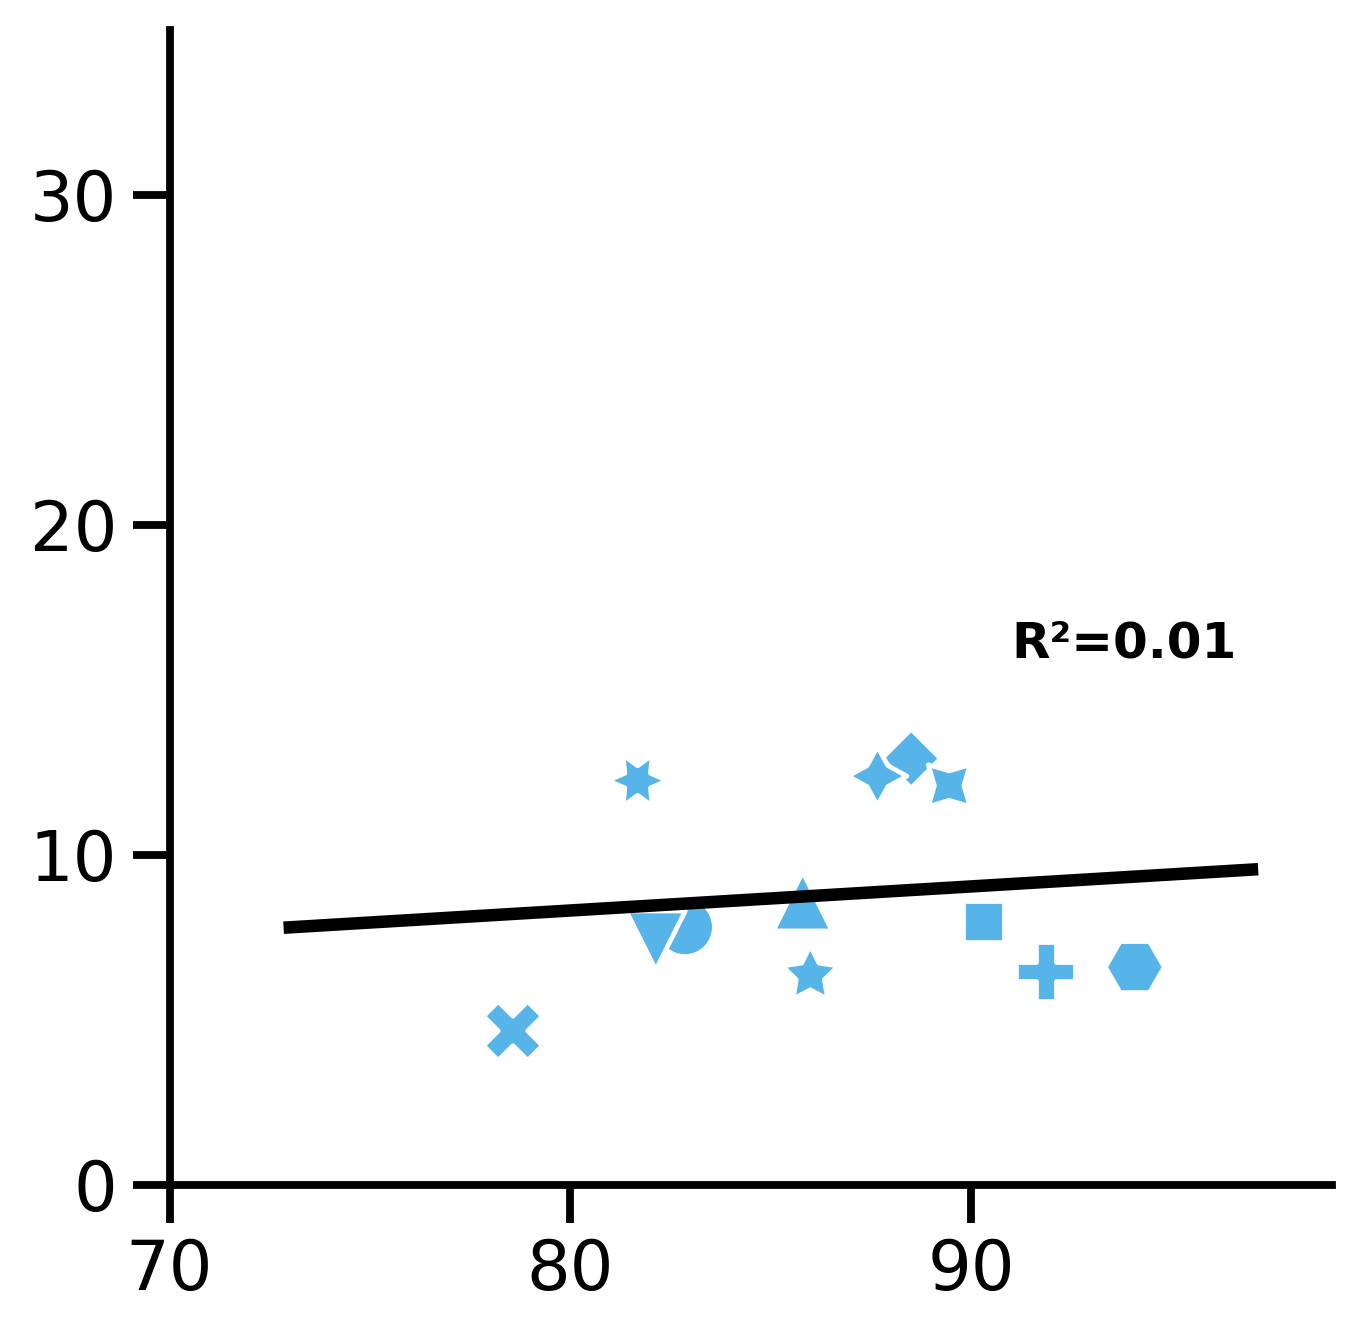

In [243]:

fig, ax = plt.subplots(figsize=(5,5), dpi=300)
sns.despine()
sns.scatterplot(data=animal_avg, x='pct_correct', y='pct_viol', ax=ax, color=c.V2_COLOR, style="animal_id", s= 200)
ax.set(xlabel="", ylabel="")

ax.legend().remove()

ax.plot(
    x_vals, y_vals,
    color='black', lw=3,
    label=(
        f"$R^2 = {r2:.2f}$"
    )
)
ax.text(x=91, y=16, s=f"R²={r2:.2f}", fontsize=12, fontweight='bold')

# Set x-ticks to be every 10
ax.set_xticks(np.arange(70, 100, 10))
ax.set_yticks(np.arange(0, 40, 10))

ax.set(ylim=(0, 35), xlim=(70, 99))

In [231]:
# 1. Compute per‐animal means
animal_avg2 = summary_df.query("animal_id != 'R027'").groupby('animal_id') \
                       .agg({'pct_correct':'mean', 'pct_viol':'mean'}) \
                       .reset_index()

# 2. Do the linear regression
x = animal_avg2['pct_correct']
y = animal_avg2['pct_viol']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
r2 = r_value**2

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R²: {r2:.4f}")

# 3. Prepare line for plotting
x_vals = np.linspace(73, 97, 100)
y_vals = intercept + slope * x_vals


Slope: 0.0729
Intercept: 2.4829
R²: 0.0139


/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_74444/327887881.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()


[(0.0, 35.0), (70.0, 99.0)]

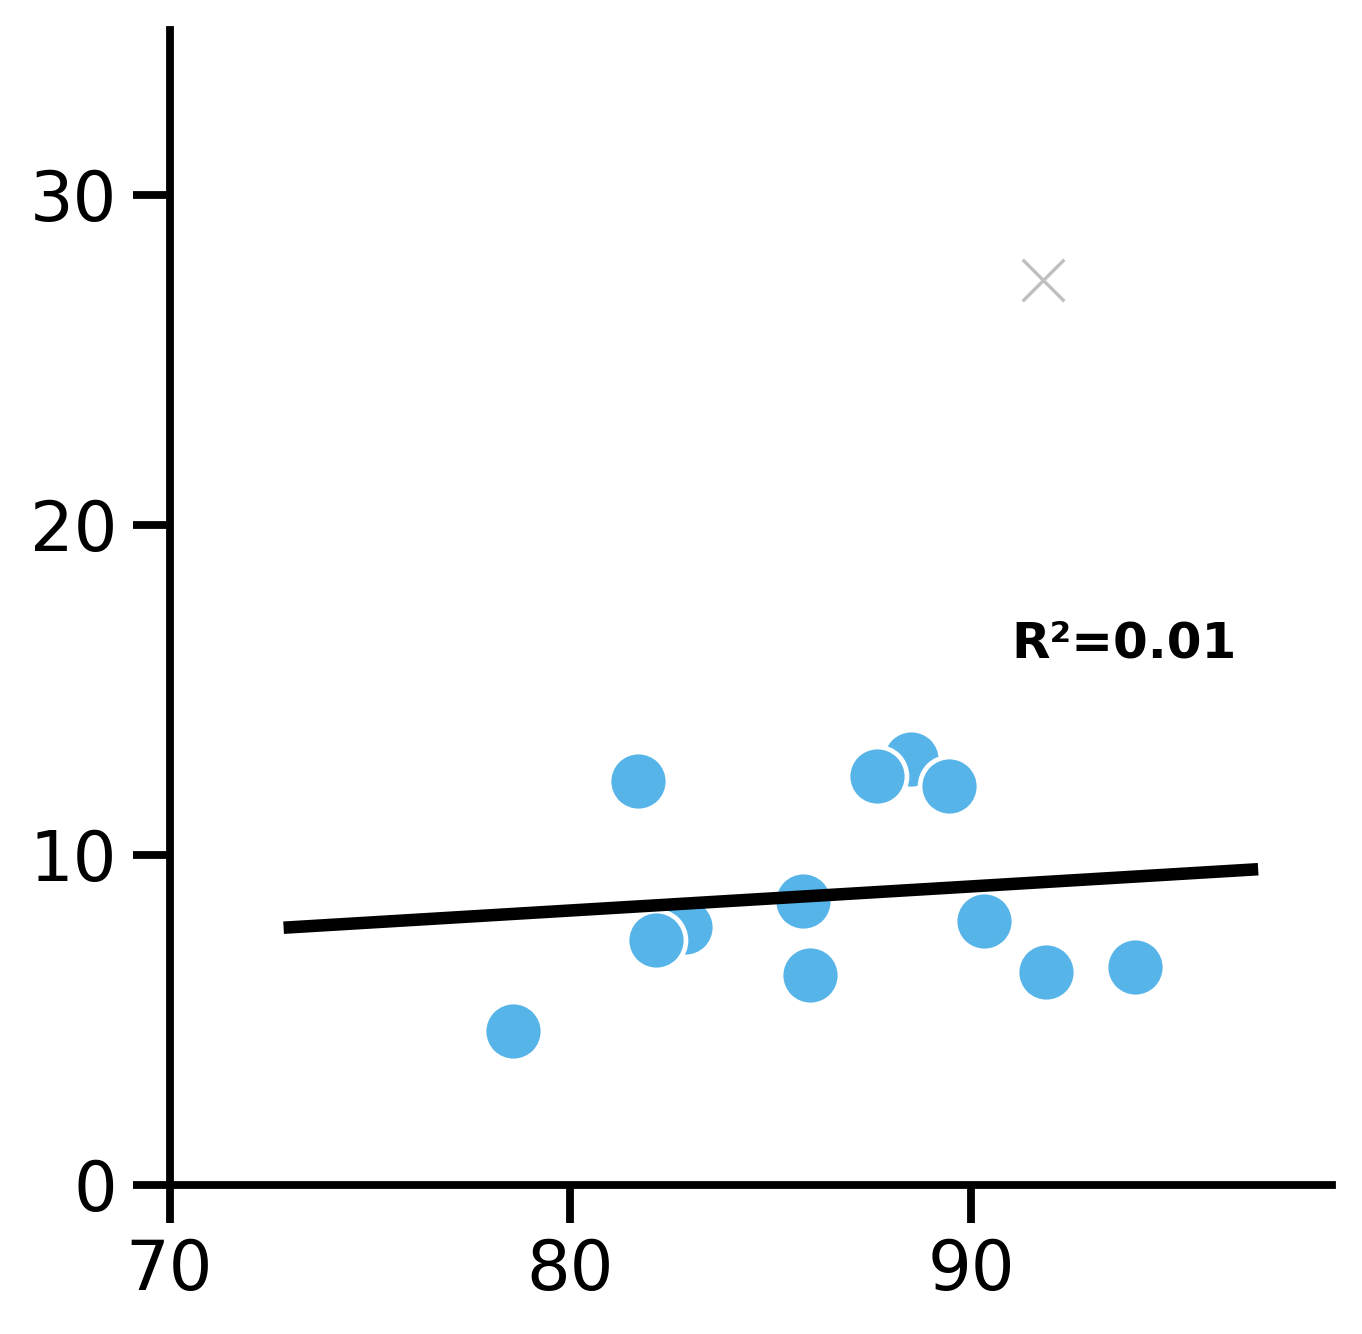

In [236]:

fig, ax = plt.subplots(figsize=(5,5), dpi=300)
sns.despine()
sns.scatterplot(data=animal_avg.query("animal_id != 'R027'"), x='pct_correct', y='pct_viol', ax=ax, color=c.V2_COLOR, s= 200)
ax.set(xlabel="", ylabel="")

sns.scatterplot(data=animal_avg.query("animal_id == 'R027'"), x='pct_correct', y='pct_viol', ax=ax, color="gray", s=100, alpha=0.5, marker="x")
ax.set(xlabel="", ylabel="")



ax.legend().remove()

ax.plot(
    x_vals, y_vals,
    color='black', lw=3,
    label=(
        f"$R^2 = {r2:.2f}$"
    )
)
ax.text(x=91, y=16, s=f"R²={r2:.2f}", fontsize=12, fontweight='bold')

# Set x-ticks to be every 10
ax.set_xticks(np.arange(70, 100, 10))
ax.set_yticks(np.arange(0, 40, 10))

ax.set(ylim=(0, 35), xlim=(70, 99))